# Парсинг данных макро + фонд


### ВВП


In [19]:
import requests
import pandas as pd

def get_gdp_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.MKTP.CD?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200 or not data or len(data) < 2:
        raise Exception("Ошибка при получении данных из API Всемирного банка.")

    gdp_data = data[1]
    df = pd.DataFrame(gdp_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'GDP']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 1990
end_year = 2022

# Список для хранения данных ВВП всех стран
all_gdp_data = []

# Получение данных ВВП для всех стран BRICS
for country, code in brics_countries.items():
    print(f"Получение данных ВВП для {country}")
    gdp_df = get_gdp_data(code, start_year, end_year)
    all_gdp_data.append(gdp_df)

# Объединение всех данных в один DataFrame
combined_gdp_df = pd.concat(all_gdp_data)

# Преобразование таблицы в формат с годами по строкам и странами по столбцам
pivot_table = combined_gdp_df.pivot_table(values='GDP', index='Year', columns='Country')

# Вывод результирующей таблицы
print(pivot_table)


Получение данных ВВП для Brazil
Получение данных ВВП для Russia
Получение данных ВВП для India
Получение данных ВВП для China
Получение данных ВВП для South Africa
Country           BRA           CHN           IND           RUS           ZAF
Year                                                                         
1990     4.619518e+11  3.945657e+11  3.209790e+11  5.170144e+11  1.260481e+11
1991     4.073378e+11  4.133754e+11  2.701053e+11  5.179630e+11  1.352037e+11
1992     3.905904e+11  4.931370e+11  2.882081e+11  4.602906e+11  1.469562e+11
1993     4.383022e+11  6.191119e+11  2.792956e+11  4.350837e+11  1.471947e+11
1994     5.462297e+11  5.643219e+11  3.272756e+11  3.950773e+11  1.535127e+11
1995     7.693331e+11  7.344848e+11  3.602819e+11  3.955372e+11  1.717359e+11
1996     8.504264e+11  8.637493e+11  3.928969e+11  3.917249e+11  1.632349e+11
1997     8.832062e+11  9.616020e+11  4.158676e+11  4.049290e+11  1.689781e+11
1998     8.637108e+11  1.029061e+12  4.213513e+11  2.709

### CPI Инфляция

In [2]:
import requests
import pandas as pd

def get_cpi_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/FP.CPI.TOTL?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200 or not data or len(data) < 2:
        raise Exception("Ошибка при получении данных из API Всемирного банка.")

    cpi_data = data[1]
    df = pd.DataFrame(cpi_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'CPI']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 1990
end_year = 2022

# Список для хранения данных CPI всех стран
all_cpi_data = []

# Получение данных CPI для всех стран BRICS
for country, code in brics_countries.items():
    print(f"Получение данных CPI для {country}")
    cpi_df = get_cpi_data(code, start_year, end_year)
    all_cpi_data.append(cpi_df)

# Объединение всех данных в один DataFrame
combined_cpi_df = pd.concat(all_cpi_data)

# Преобразование таблицы в формат с годами по строкам и странами по столбцам
pivot_table_cpi = combined_cpi_df.pivot_table(values='CPI', index='Year', columns='Country')

# Вывод результирующей таблицы
print(pivot_table_cpi)


Получение данных CPI для Brazil
Получение данных CPI для Russia
Получение данных CPI для India
Получение данных CPI для China
Получение данных CPI для South Africa
Country         BRA         CHN         IND         RUS         ZAF
Year                                                               
1990       0.000893   40.440263   22.949008         NaN   25.431333
1991       0.004756   41.878596   26.132091         NaN   29.331177
1992       0.050033   44.539554   29.212495    0.053596   33.400784
1993       1.014369   51.046818   31.060737    0.522155   36.646495
1994      22.071544   63.429240   34.243821    2.128943   39.922151
1995      36.640316   74.079786   37.745213    6.331779   43.387571
1996      42.413974   80.238158   41.133658    9.355331   46.578342
1997      45.351868   82.473966   44.080577   10.736302   50.583046
1998      46.800895   81.836289   49.912808   13.708721   54.063436
1999      49.074692   80.689376   52.243646   25.463468   56.864730
2000      52.531583 

### Денежная масса (М2)

In [3]:
import requests
import pandas as pd

def get_m2_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/FM.LBL.BMNY.GD.ZS?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Ошибка при выполнении запроса к API Всемирного банка для {country_code}. Код ошибки: {response.status_code}")

    data = response.json()
    if not data or len(data) < 2:
        raise Exception(f"Ошибка при получении данных из API Всемирного банка для {country_code}. Данные отсутствуют или некорректны.")

    m2_data = data[1]
    df = pd.DataFrame(m2_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'M2']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 1990
end_year = 2022

# Список для хранения данных M2 всех стран
all_m2_data = []

# Получение данных M2 для всех стран BRICS
for country, code in brics_countries.items():
    try:
        print(f"Получение данных M2 для {country}")
        m2_df = get_m2_data(code, start_year, end_year)
        all_m2_data.append(m2_df)
    except Exception as e:
        print(e)

# Объединение всех данных в один DataFrame
if all_m2_data:
    combined_m2_df = pd.concat(all_m2_data)
    # Преобразование таблицы в формат с годами по строкам и странами по столбцам
    pivot_table_m2 = combined_m2_df.pivot_table(values='M2', index='Year', columns='Country')
    # Вывод результирующей таблицы
    print(pivot_table_m2)
else:
    print("Нет данных для создания таблицы.")


Получение данных M2 для Brazil
Получение данных M2 для Russia
Получение данных M2 для India
Получение данных M2 для China
Получение данных M2 для South Africa
Country         BRA         CHN        IND        RUS        ZAF
Year                                                            
1990      30.394514   77.793684  42.183773        NaN  47.813566
1991      35.029601   84.518831  43.417856        NaN  48.913859
1992      60.932409   89.456590  44.144429        NaN  44.817606
1993      93.658846  100.021219  44.883459        NaN  41.516549
1994      45.461304   96.469489  46.021465        NaN  43.344559
1995      32.448547   99.027727  43.545309        NaN  44.011019
1996      35.118482  105.962197  44.689437        NaN  44.640674
1997      36.965129  115.245260  47.459982        NaN  47.402507
1998      39.331732  123.903377  48.901307        NaN  49.600694
1999      42.811054  133.653061  51.064926        NaN  50.259180
2000      46.486588  135.580416  54.645129        NaN  47.364

### Безработица

In [4]:
import requests
import pandas as pd

def get_unemployment_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/SL.UEM.TOTL.ZS?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Ошибка при выполнении запроса к API Всемирного банка для {country_code}. Код ошибки: {response.status_code}")

    data = response.json()
    if not data or len(data) < 2:
        raise Exception(f"Ошибка при получении данных из API Всемирного банка для {country_code}. Данные отсутствуют или некорректны.")

    unemployment_data = data[1]
    df = pd.DataFrame(unemployment_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'Unemployment']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 1990
end_year = 2022

# Список для хранения данных уровня безработицы всех стран
all_unemployment_data = []

# Получение данных уровня безработицы для всех стран BRICS
for country, code in brics_countries.items():
    try:
        print(f"Получение данных уровня безработицы для {country}")
        unemployment_df = get_unemployment_data(code, start_year, end_year)
        all_unemployment_data.append(unemployment_df)
    except Exception as e:
        print(e)

# Объединение всех данных в один DataFrame
if all_unemployment_data:
    combined_unemployment_df = pd.concat(all_unemployment_data)
    # Преобразование таблицы в формат с годами по строкам и странами по столбцам
    pivot_table_unemployment = combined_unemployment_df.pivot_table(values='Unemployment', index='Year', columns='Country')
    # Вывод результирующей таблицы
    print(pivot_table_unemployment)
else:
    print("Нет данных для создания таблицы.")


Получение данных уровня безработицы для Brazil
Получение данных уровня безработицы для Russia
Получение данных уровня безработицы для India
Получение данных уровня безработицы для China
Получение данных уровня безработицы для South Africa
Country     BRA   CHN    IND     RUS     ZAF
Year                                        
1991      6.254  2.37  6.838   5.134  20.543
1992      6.420  2.37  6.838   5.180  20.945
1993      6.030  2.69  6.838   5.880  20.819
1994      6.577  2.90  6.830   8.130  20.464
1995      7.090  3.00  6.998   9.450  20.032
1996      8.030  3.12  7.165   9.670  19.787
1997      9.000  3.23  7.339  11.810  19.836
1998     10.150  3.24  7.511  13.260  20.048
1999     11.130  3.25  7.680  13.040  20.204
2000     10.894  3.26  7.850  10.580  20.069
2001     10.650  3.80  8.022   8.980  19.887
2002     10.640  4.24  8.202   7.880  19.781
2003     11.170  4.58  8.368   8.210  19.882
2004     10.070  4.49  8.535   7.760  19.732
2005     10.550  4.52  8.700   7.120  19.

### Процентные ставки

In [5]:
import requests
import pandas as pd

def get_interest_rate_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/FR.INR.LEND?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Ошибка при выполнении запроса к API Всемирного банка для {country_code}. Код ошибки: {response.status_code}")

    data = response.json()
    if not data or len(data) < 2:
        raise Exception(f"Ошибка при получении данных из API Всемирного банка для {country_code}. Данные отсутствуют или некорректны.")

    interest_rate_data = data[1]
    df = pd.DataFrame(interest_rate_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'InterestRate']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 1990
end_year = 2022

# Список для хранения данных процентных ставок всех стран
all_interest_rate_data = []

# Получение данных процентных ставок для всех стран BRICS
for country, code in brics_countries.items():
    try:
        print(f"Получение данных процентных ставок для {country}")
        interest_rate_df = get_interest_rate_data(code, start_year, end_year)
        all_interest_rate_data.append(interest_rate_df)
    except Exception as e:
        print(e)

# Объединение всех данных в один DataFrame
if all_interest_rate_data:
    combined_interest_rate_df = pd.concat(all_interest_rate_data)
    # Преобразование таблицы в формат с годами по строкам и странами по столбцам
    pivot_table_interest_rate = combined_interest_rate_df.pivot_table(values='InterestRate', index='Year', columns='Country')
    # Вывод результирующей таблицы
    print(pivot_table_interest_rate)
else:
    print("Нет данных для создания таблицы.")

Получение данных процентных ставок для Brazil
Получение данных процентных ставок для Russia
Получение данных процентных ставок для India
Получение данных процентных ставок для China
Получение данных процентных ставок для South Africa
Country        BRA    CHN        IND        RUS        ZAF
Year                                                      
1990           NaN   9.36  16.500000        NaN  21.000000
1991           NaN   8.64  17.875000        NaN  20.312500
1992           NaN   8.64  18.916667        NaN  18.905833
1993           NaN  10.98  16.250000        NaN  16.158333
1994           NaN  10.98  14.750000        NaN  15.583333
1995           NaN  12.06  15.458333        NaN  17.895833
1996           NaN  10.08  15.958333        NaN  19.520833
1997     78.193333   8.64  13.833333  32.041667  20.000000
1998     86.363333   6.39  13.541667  41.791667  21.791667
1999     80.443333   5.85  12.541667  39.716667  18.000000
2000     56.830000   5.85  12.291667  24.433333  14.500000

### Валютный курс к доллару


In [6]:
import requests
import pandas as pd

def get_exchange_rate_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/PA.NUS.FCRF?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Ошибка при выполнении запроса к API Всемирного банка для {country_code}. Код ошибки: {response.status_code}")

    data = response.json()
    if not data or len(data) < 2:
        raise Exception(f"Ошибка при получении данных из API Всемирного банка для {country_code}. Данные отсутствуют или некорректны.")

    exchange_rate_data = data[1]
    df = pd.DataFrame(exchange_rate_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'ExchangeRate']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 2010
end_year = 2020

# Список для хранения данных валютных курсов всех стран
all_exchange_rate_data = []

# Получение данных валютных курсов для всех стран BRICS
for country, code in brics_countries.items():
    try:
        print(f"Получение данных валютных курсов для {country}")
        exchange_rate_df = get_exchange_rate_data(code, start_year, end_year)
        all_exchange_rate_data.append(exchange_rate_df)
    except Exception as e:
        print(e)

# Объединение всех данных в один DataFrame
if all_exchange_rate_data:
    combined_exchange_rate_df = pd.concat(all_exchange_rate_data)
    # Преобразование таблицы в формат с годами по строкам и странами по столбцам
    pivot_table_exchange_rate = combined_exchange_rate_df.pivot_table(values='ExchangeRate', index='Year', columns='Country')
    # Вывод результирующей таблицы
    print(pivot_table_exchange_rate)
else:
    print("Нет данных для создания таблицы.")


Получение данных валютных курсов для Brazil
Получение данных валютных курсов для Russia
Получение данных валютных курсов для India
Получение данных валютных курсов для China
Получение данных валютных курсов для South Africa
Country       BRA       CHN        IND        RUS        ZAF
Year                                                        
2010     1.759227  6.770269  45.725812  30.367915   7.321222
2011     1.672829  6.461461  46.670467  29.382341   7.261132
2012     1.953069  6.312333  53.437233  30.839831   8.209969
2013     2.156089  6.195758  58.597845  31.837144   9.655056
2014     2.352952  6.143434  61.029514  38.378207  10.852656
2015     3.326904  6.227489  64.151944  60.937650  12.758931
2016     3.491313  6.644478  67.195313  67.055933  14.709611
2017     3.191389  6.758755  65.121569  58.342801  13.323801
2018     3.653825  6.615957  68.389467  62.668133  13.233926
2019     3.944471  6.908385  70.420341  64.737658  14.448427
2020     5.155179  6.900767  74.099567  72.1

### Баланс внешней торговли

In [7]:
import requests
import pandas as pd

def get_trade_balance_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/NE.RSB.GNFS.CD?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Ошибка при выполнении запроса к API Всемирного банка для {country_code}. Код ошибки: {response.status_code}")

    data = response.json()
    if not data or len(data) < 2:
        raise Exception(f"Ошибка при получении данных из API Всемирного банка для {country_code}. Данные отсутствуют или некорректны.")

    trade_balance_data = data[1]
    df = pd.DataFrame(trade_balance_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'TradeBalance']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 2010
end_year = 2020

# Список для хранения данных торгового баланса всех стран
all_trade_balance_data = []

# Получение данных торгового баланса для всех стран BRICS
for country, code in brics_countries.items():
    try:
        print(f"Получение данных торгового баланса для {country}")
        trade_balance_df = get_trade_balance_data(code, start_year, end_year)
        all_trade_balance_data.append(trade_balance_df)
    except Exception as e:
        print(e)

# Объединение всех данных в один DataFrame
if all_trade_balance_data:
    combined_trade_balance_df = pd.concat(all_trade_balance_data)
    # Преобразование таблицы в формат с годами по строкам и странами по столбцам
    pivot_table_trade_balance = combined_trade_balance_df.pivot_table(values='TradeBalance', index='Year', columns='Country')
    # Вывод результирующей таблицы
    print(pivot_table_trade_balance)
else:
    print("Нет данных для создания таблицы.")


Получение данных торгового баланса для Brazil
Получение данных торгового баланса для Russia
Получение данных торгового баланса для India
Получение данных торгового баланса для China
Получение данных торгового баланса для South Africa
Country           BRA           CHN           IND           RUS           ZAF
Year                                                                         
2010    -2.299419e+10  2.224009e+11 -7.462086e+10  1.231464e+11  4.844543e+09
2011    -2.012818e+10  1.808953e+11 -1.192833e+11  1.652149e+11  3.482071e+09
2012    -3.350726e+10  2.318640e+11 -1.229061e+11  1.471441e+11 -5.665968e+09
2013    -5.691184e+10  2.348721e+11 -5.537504e+10  1.238742e+11 -8.484620e+09
2014    -6.536810e+10  2.215496e+11 -6.089361e+10  1.322209e+11 -5.711638e+09
2015    -2.078389e+10  3.588364e+11 -4.830965e+10  1.097253e+11 -4.505145e+09
2016     7.176956e+09  2.554843e+11 -4.052648e+10  6.627601e+10  1.459108e+09
2017     1.482019e+10  2.156971e+11 -8.375920e+10  8.351502e+10 

### Государственный долг

In [8]:
import requests
import pandas as pd

def get_government_debt_data(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/GC.DOD.TOTL.GD.ZS?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Ошибка при выполнении запроса к API Всемирного банка для {country_code}. Код ошибки: {response.status_code}")

    data = response.json()
    if not data or len(data) < 2:
        raise Exception(f"Ошибка при получении данных из API Всемирного банка для {country_code}. Данные отсутствуют или некорректны.")

    government_debt_data = data[1]
    df = pd.DataFrame(government_debt_data)
    df = df[['date', 'value']]
    df.columns = ['Year', 'GovernmentDebt']
    df['Country'] = country_code

    return df

# Список кодов стран BRICS
brics_countries = {
    'Brazil': 'BRA',
    'Russia': 'RUS',
    'India': 'IND',
    'China': 'CHN',
    'South Africa': 'ZAF'
}

# Период для получения данных
start_year = 1990
end_year = 2022

# Список для хранения данных государственного долга всех стран
all_government_debt_data = []

# Получение данных государственного долга для всех стран BRICS
for country, code in brics_countries.items():
    try:
        print(f"Получение данных государственного долга для {country}")
        government_debt_df = get_government_debt_data(code, start_year, end_year)
        all_government_debt_data.append(government_debt_df)
    except Exception as e:
        print(e)

# Объединение всех данных в один DataFrame
if all_government_debt_data:
    combined_government_debt_df = pd.concat(all_government_debt_data)
    # Преобразование таблицы в формат с годами по строкам и странами по столбцам
    pivot_table_government_debt = combined_government_debt_df.pivot_table(values='GovernmentDebt', index='Year', columns='Country')
    # Вывод результирующей таблицы
    print(pivot_table_government_debt)
else:
    print("Нет данных для создания таблицы.")


Получение данных государственного долга для Brazil
Получение данных государственного долга для Russia
Получение данных государственного долга для India
Получение данных государственного долга для China
Получение данных государственного долга для South Africa
Country        BRA        IND         RUS        ZAF
Year                                                
1990           NaN  50.783254         NaN  32.397195
1991           NaN  50.010080         NaN  33.913591
1992           NaN  49.680901         NaN  36.902231
1993           NaN  51.759808         NaN  39.950772
1994           NaN  49.594283         NaN  44.816970
1995           NaN  47.491641         NaN  44.868619
1996           NaN  45.723308         NaN  44.229876
1997           NaN  50.365436         NaN  43.175546
1998           NaN  50.319218  143.949000  44.654262
1999           NaN  51.352951  100.744138  42.178032
2000           NaN  55.004246   62.148889  39.639058
2001           NaN  59.017910   48.983615        NaN

### Индексы

In [9]:
import yfinance as yf
import pandas as pd

# Список фондовых индексов для стран BRICS
brics_indices = {
    'Brazil': '^BVSP',
    'Russia': 'IMOEX.ME',
    'India': '^BSESN',
    'China': '000001.SS',
    'South Africa': '^JALSH'
}

# Период для получения данных
start_date = '1990-01-01'
end_date = '2022-12-31'

# Список для хранения данных фондовых индексов всех стран
all_stock_index_data = []

# Получение данных фондовых индексов для всех стран BRICS
for country, index in brics_indices.items():
    print(f"Получение данных фондового индекса для {country}")
    stock_data = yf.download(index, start=start_date, end=end_date, progress=False)
    stock_data.reset_index(inplace=True)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data['Year'] = stock_data['Date'].dt.year
    yearly_stock_data = stock_data.groupby('Year')['Close'].mean().reset_index()
    yearly_stock_data.columns = ['Year', 'StockIndex']
    yearly_stock_data['Country'] = country
    all_stock_index_data.append(yearly_stock_data)

# Объединение всех данных в один DataFrame
combined_stock_index_df = pd.concat(all_stock_index_data)

# Преобразование таблицы в формат с годами по строкам и странами по столбцам
pivot_table_stock_index = combined_stock_index_df.pivot_table(values='StockIndex', index='Year', columns='Country')

# Вывод результирующей таблицы
print(pivot_table_stock_index)



Получение данных фондового индекса для Brazil
Получение данных фондового индекса для Russia
Получение данных фондового индекса для India
Получение данных фондового индекса для China


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^JALSH']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 1990-01-01 -> 2022-12-31)')


Получение данных фондового индекса для South Africa
$^JALSH: possibly delisted; No price data found  (1d 1990-01-01 -> 2022-12-31)
Country         Brazil        China         India       Russia
Year                                                          
1993        129.204070          NaN           NaN          NaN
1994       3165.315926          NaN           NaN          NaN
1995       3902.182525          NaN           NaN          NaN
1996       5869.416531          NaN           NaN          NaN
1997      10376.894368  1168.374576   3927.985165          NaN
1998       9261.004049  1260.917798   3332.287905          NaN
1999      11085.808943  1377.955346   4172.342577          NaN
2000      16263.463710  1881.233979   4611.349433          NaN
2001      14046.702041  1956.159814   3485.098702          NaN
2002      11445.935743  1567.229279   3261.259849          NaN
2003      14449.316000  1467.737625   3869.645790          NaN
2004      22314.289157  1482.852699   5559.717764 

### Объединение функций для разных стран

In [27]:
import requests
import pandas as pd
import yfinance as yf
import numpy as np

def get_macro_data_world_bank(country_code, indicator, column_name, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}?date={start_year}:{end_year}&format=json"
    response = requests.get(url)

    if response.status_code != 200:
        return None

    data = response.json()
    if not data or len(data) < 2:
        return None

    macro_data = data[1]
    df = pd.DataFrame(macro_data)
    df = df[['date', 'value']]
    df.columns = ['Year', column_name]
    df['Year'] = df['Year'].astype(int)

    return df

def fill_missing_values(data):
    # Заполнение пропущенных значений ближайшими вперед и назад
    data = data.ffill().bfill()
    return data

def get_stock_index_data(ticker, start_date, end_date):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        stock_data.reset_index(inplace=True)
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data['Year'] = stock_data['Date'].dt.year
        yearly_stock_data = stock_data.groupby('Year')['Close'].mean().reset_index()
        yearly_stock_data.columns = ['Year', 'StockIndex']
        return yearly_stock_data
    except Exception as e:
        print(f"Error downloading data for ticker {ticker}: {e}")
        return pd.DataFrame(columns=['Year', 'StockIndex'])

# Список макроэкономических показателей и их кодов
indicators = {
    'GDP': ('NY.GDP.MKTP.CD', 'GDP'),
    'CPI': ('FP.CPI.TOTL', 'CPI'),
    'Unemployment': ('SL.UEM.TOTL.ZS', 'Unemployment'),
    'M2': ('FM.LBL.BMNY.GD.ZS', 'M2'),
    'InterestRate': ('FR.INR.LEND', 'InterestRate'),
    'ExchangeRate': ('PA.NUS.FCRF', 'ExchangeRate'),
    'TradeBalance': ('NE.RSB.GNFS.CD', 'TradeBalance'),
    'GovernmentDebt': ('GC.DOD.TOTL.GD.ZS', 'GovernmentDebt')
}

# Список стран BRICS и их соответствующих кодов и фондовых индексов
brics_countries = {
    'Brazil': {'code': 'BRA', 'index': '^BVSP'},
    'Russia': {'code': 'RUS', 'index': 'IMOEX.ME'},
    'India': {'code': 'IND', 'index': '^BSESN'},
    'China': {'code': 'CHN', 'index': '000001.SS'},
    'South Africa': {'code': 'ZAF', 'index': '^J203.JO'}  # Updated to a different index
}

# Период для получения данных
start_year = 1990
end_year = 2022
start_date = '1990-01-01'
end_date = '2022-12-31'

# Получение данных и создание таблиц для каждой страны
for country, info in brics_countries.items():
    country_code = info['code']
    stock_index = info['index']

    print(f"Collecting data for {country}")

    # Сбор данных по макроэкономическим показателям
    macro_data_list = []
    for indicator_name, (indicator_code, column_name) in indicators.items():
        try:
            macro_df = get_macro_data_world_bank(country_code, indicator_code, column_name, start_year, end_year)
            if macro_df is not None and not macro_df.empty:
                macro_df = fill_missing_values(macro_df)
            macro_data_list.append(macro_df)
        except Exception as e:
            print(f"Error retrieving macroeconomic data for {country}, indicator {indicator_name}: {e}")

    # Объединение всех макроэкономических данных
    if macro_data_list:
        combined_macro_data = pd.concat(macro_data_list, axis=1)
        combined_macro_data = combined_macro_data.loc[:,~combined_macro_data.columns.duplicated()]
    else:
        combined_macro_data = pd.DataFrame()

    # Сбор данных по фондовому индексу
    stock_index_data = get_stock_index_data(stock_index, start_date, end_date)

    # Объединение макроэкономических данных и данных фондового индекса
    if not combined_macro_data.empty and not stock_index_data.empty:
        final_data = pd.merge(combined_macro_data, stock_index_data, on='Year', how='inner')
        # Сохранение данных в CSV файл
        final_data.to_csv(f'{country}_macro_stock_data.csv', index=False)
        print(f"Data for {country} saved to file {country}_macro_stock_data.csv")
    else:
        print(f"Insufficient data for {country}, not saving to file")


Data for Brazil saved to file Brazil_macro_stock_data.csv
Data for Russia saved to file Russia_macro_stock_data.csv
Data for India saved to file India_macro_stock_data.csv
Data for China saved to file China_macro_stock_data.csv
Data for South Africa saved to file South Africa_macro_stock_data.csv


# EDA

Data for Brazil loaded successfully.


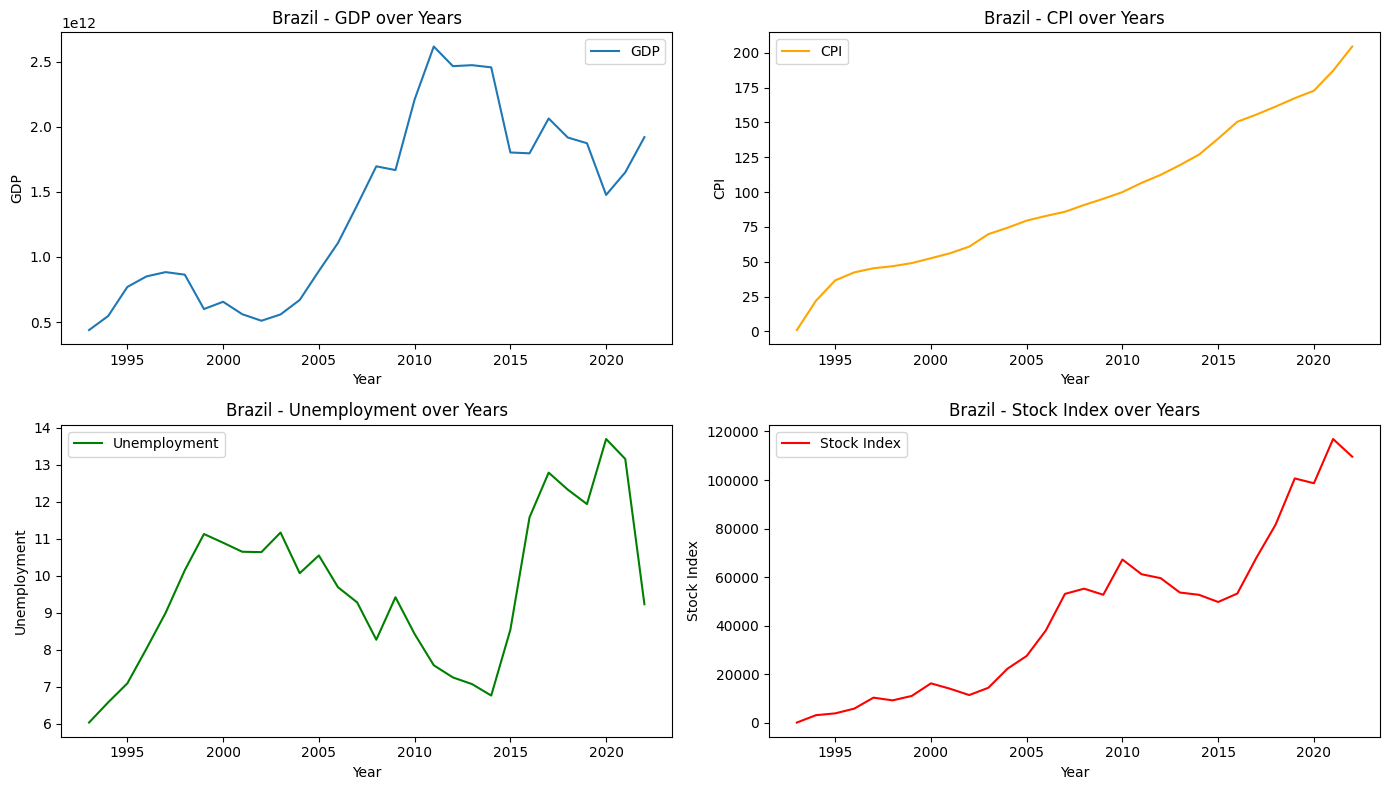

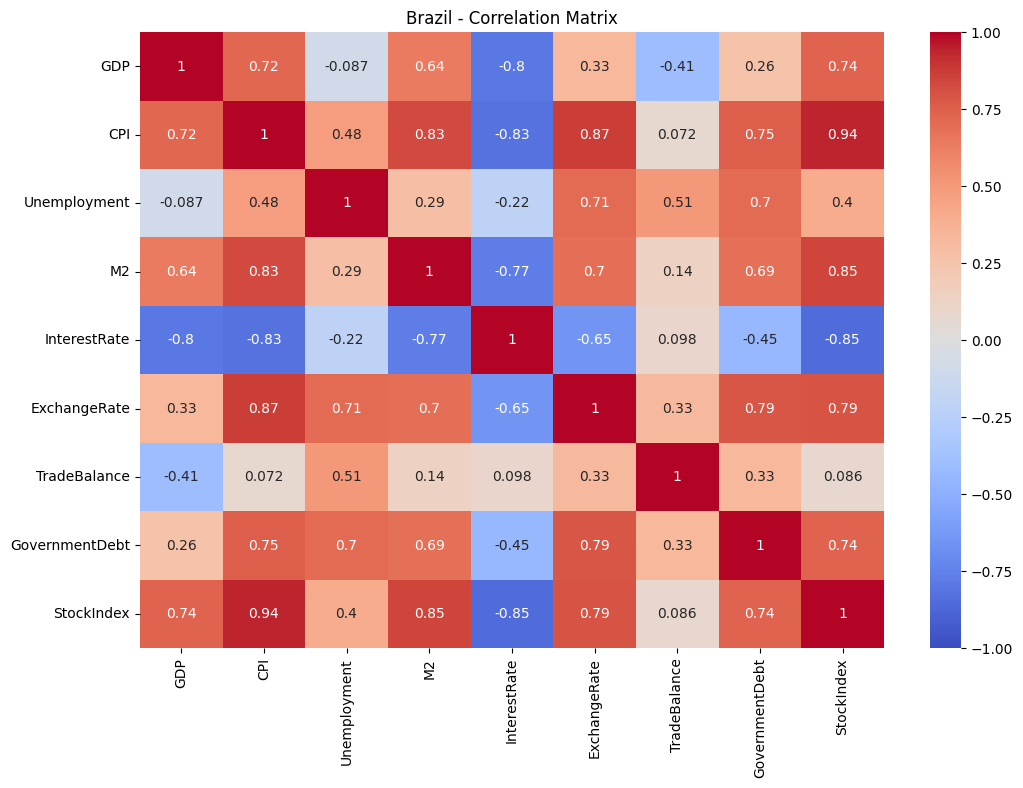

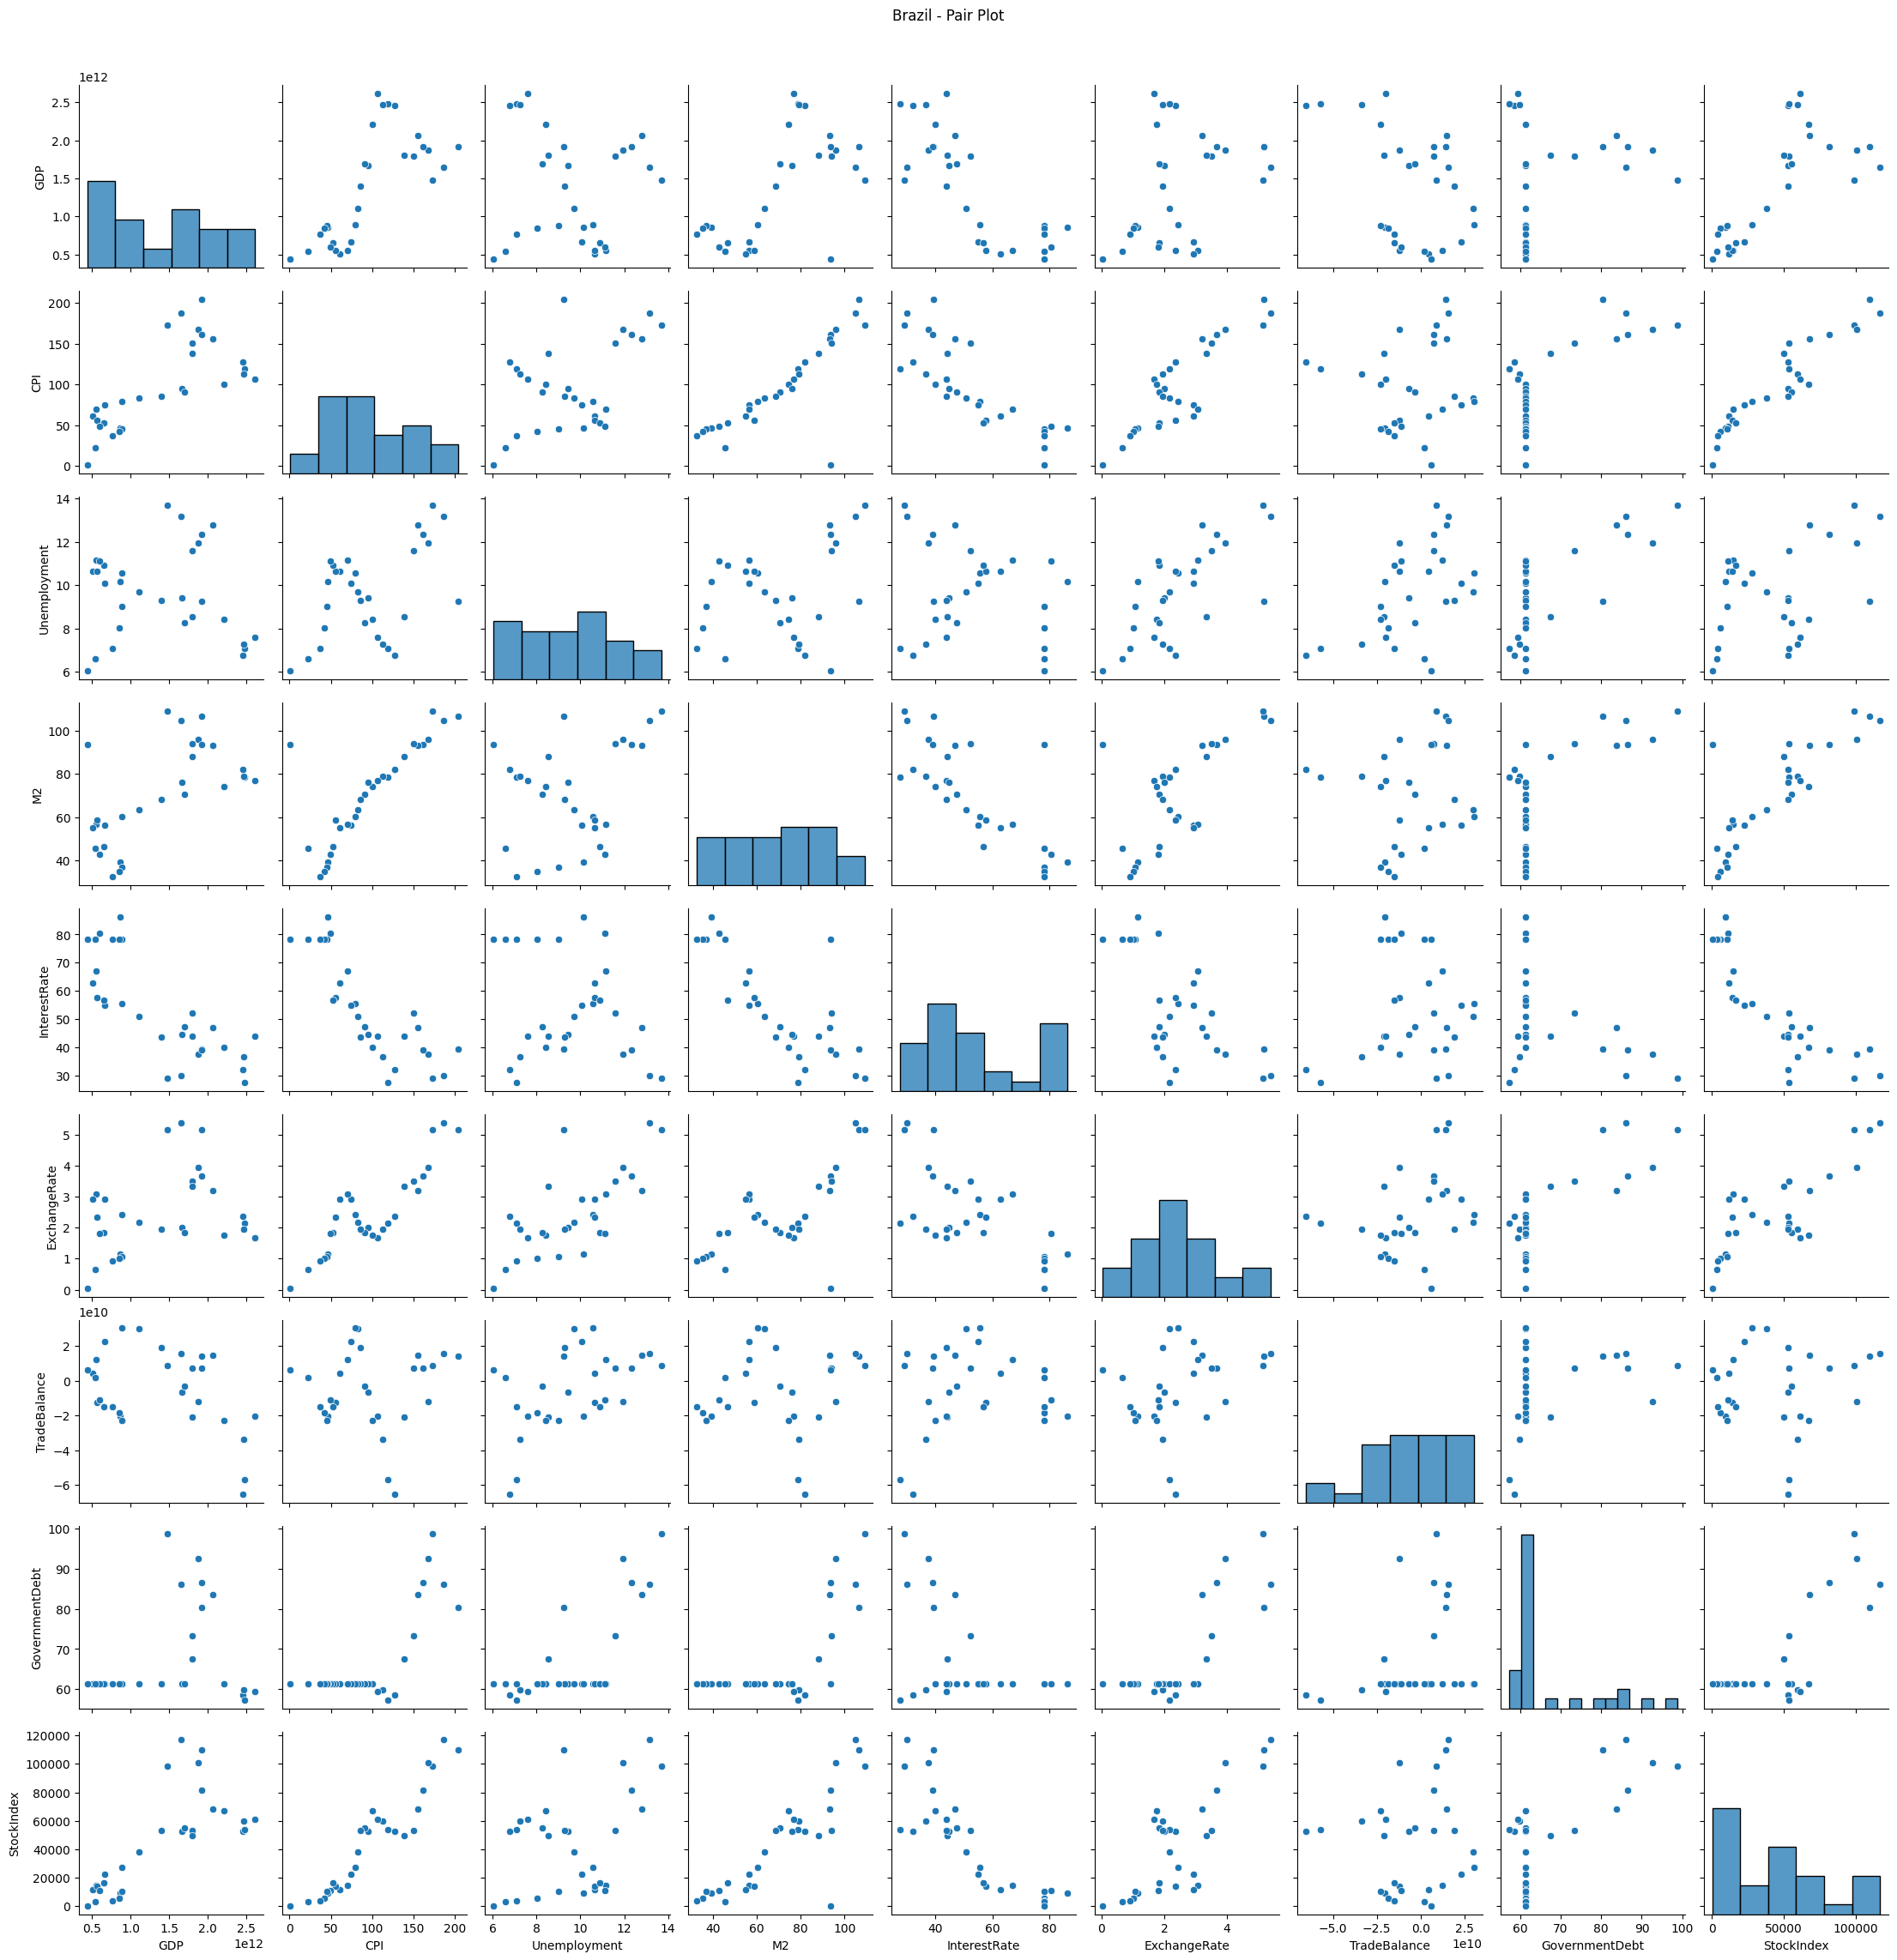

Data for Russia loaded successfully.


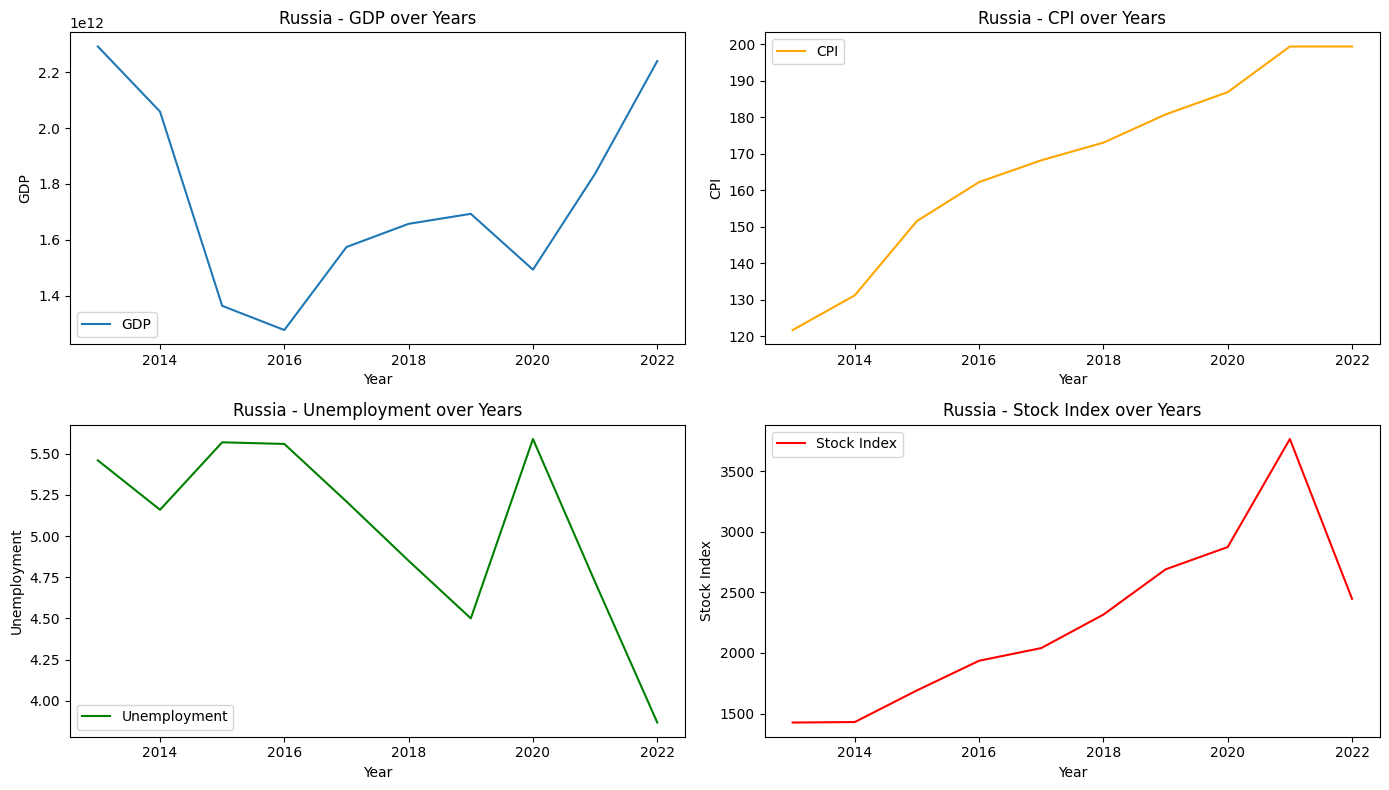

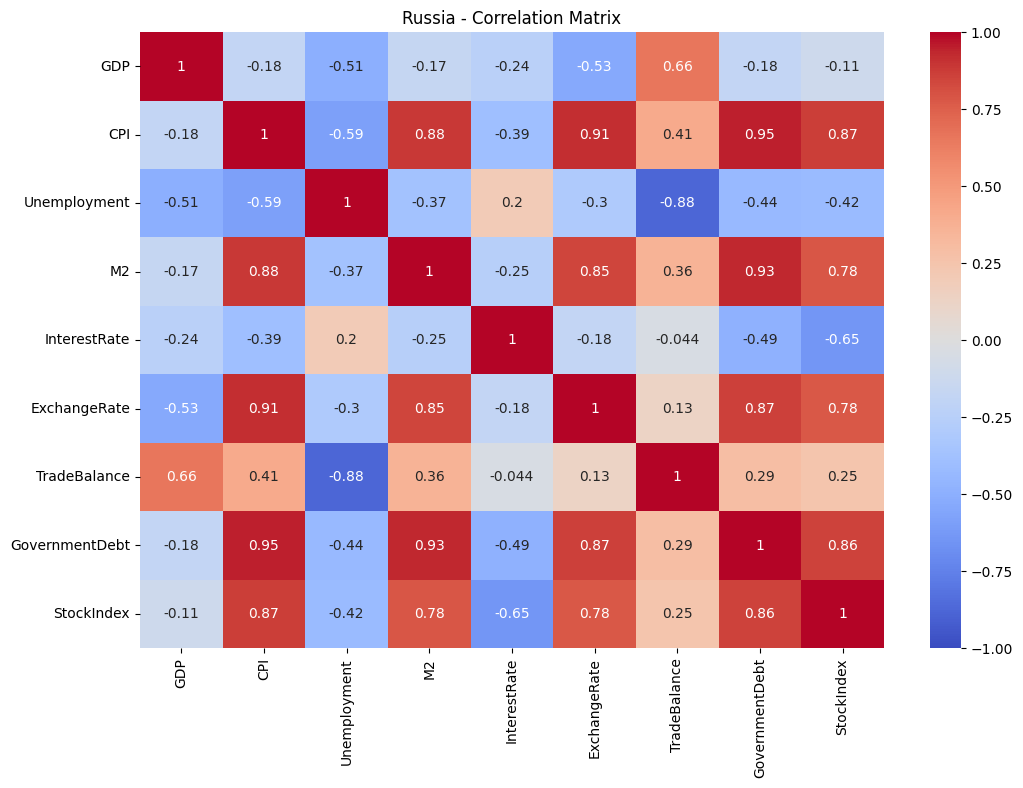

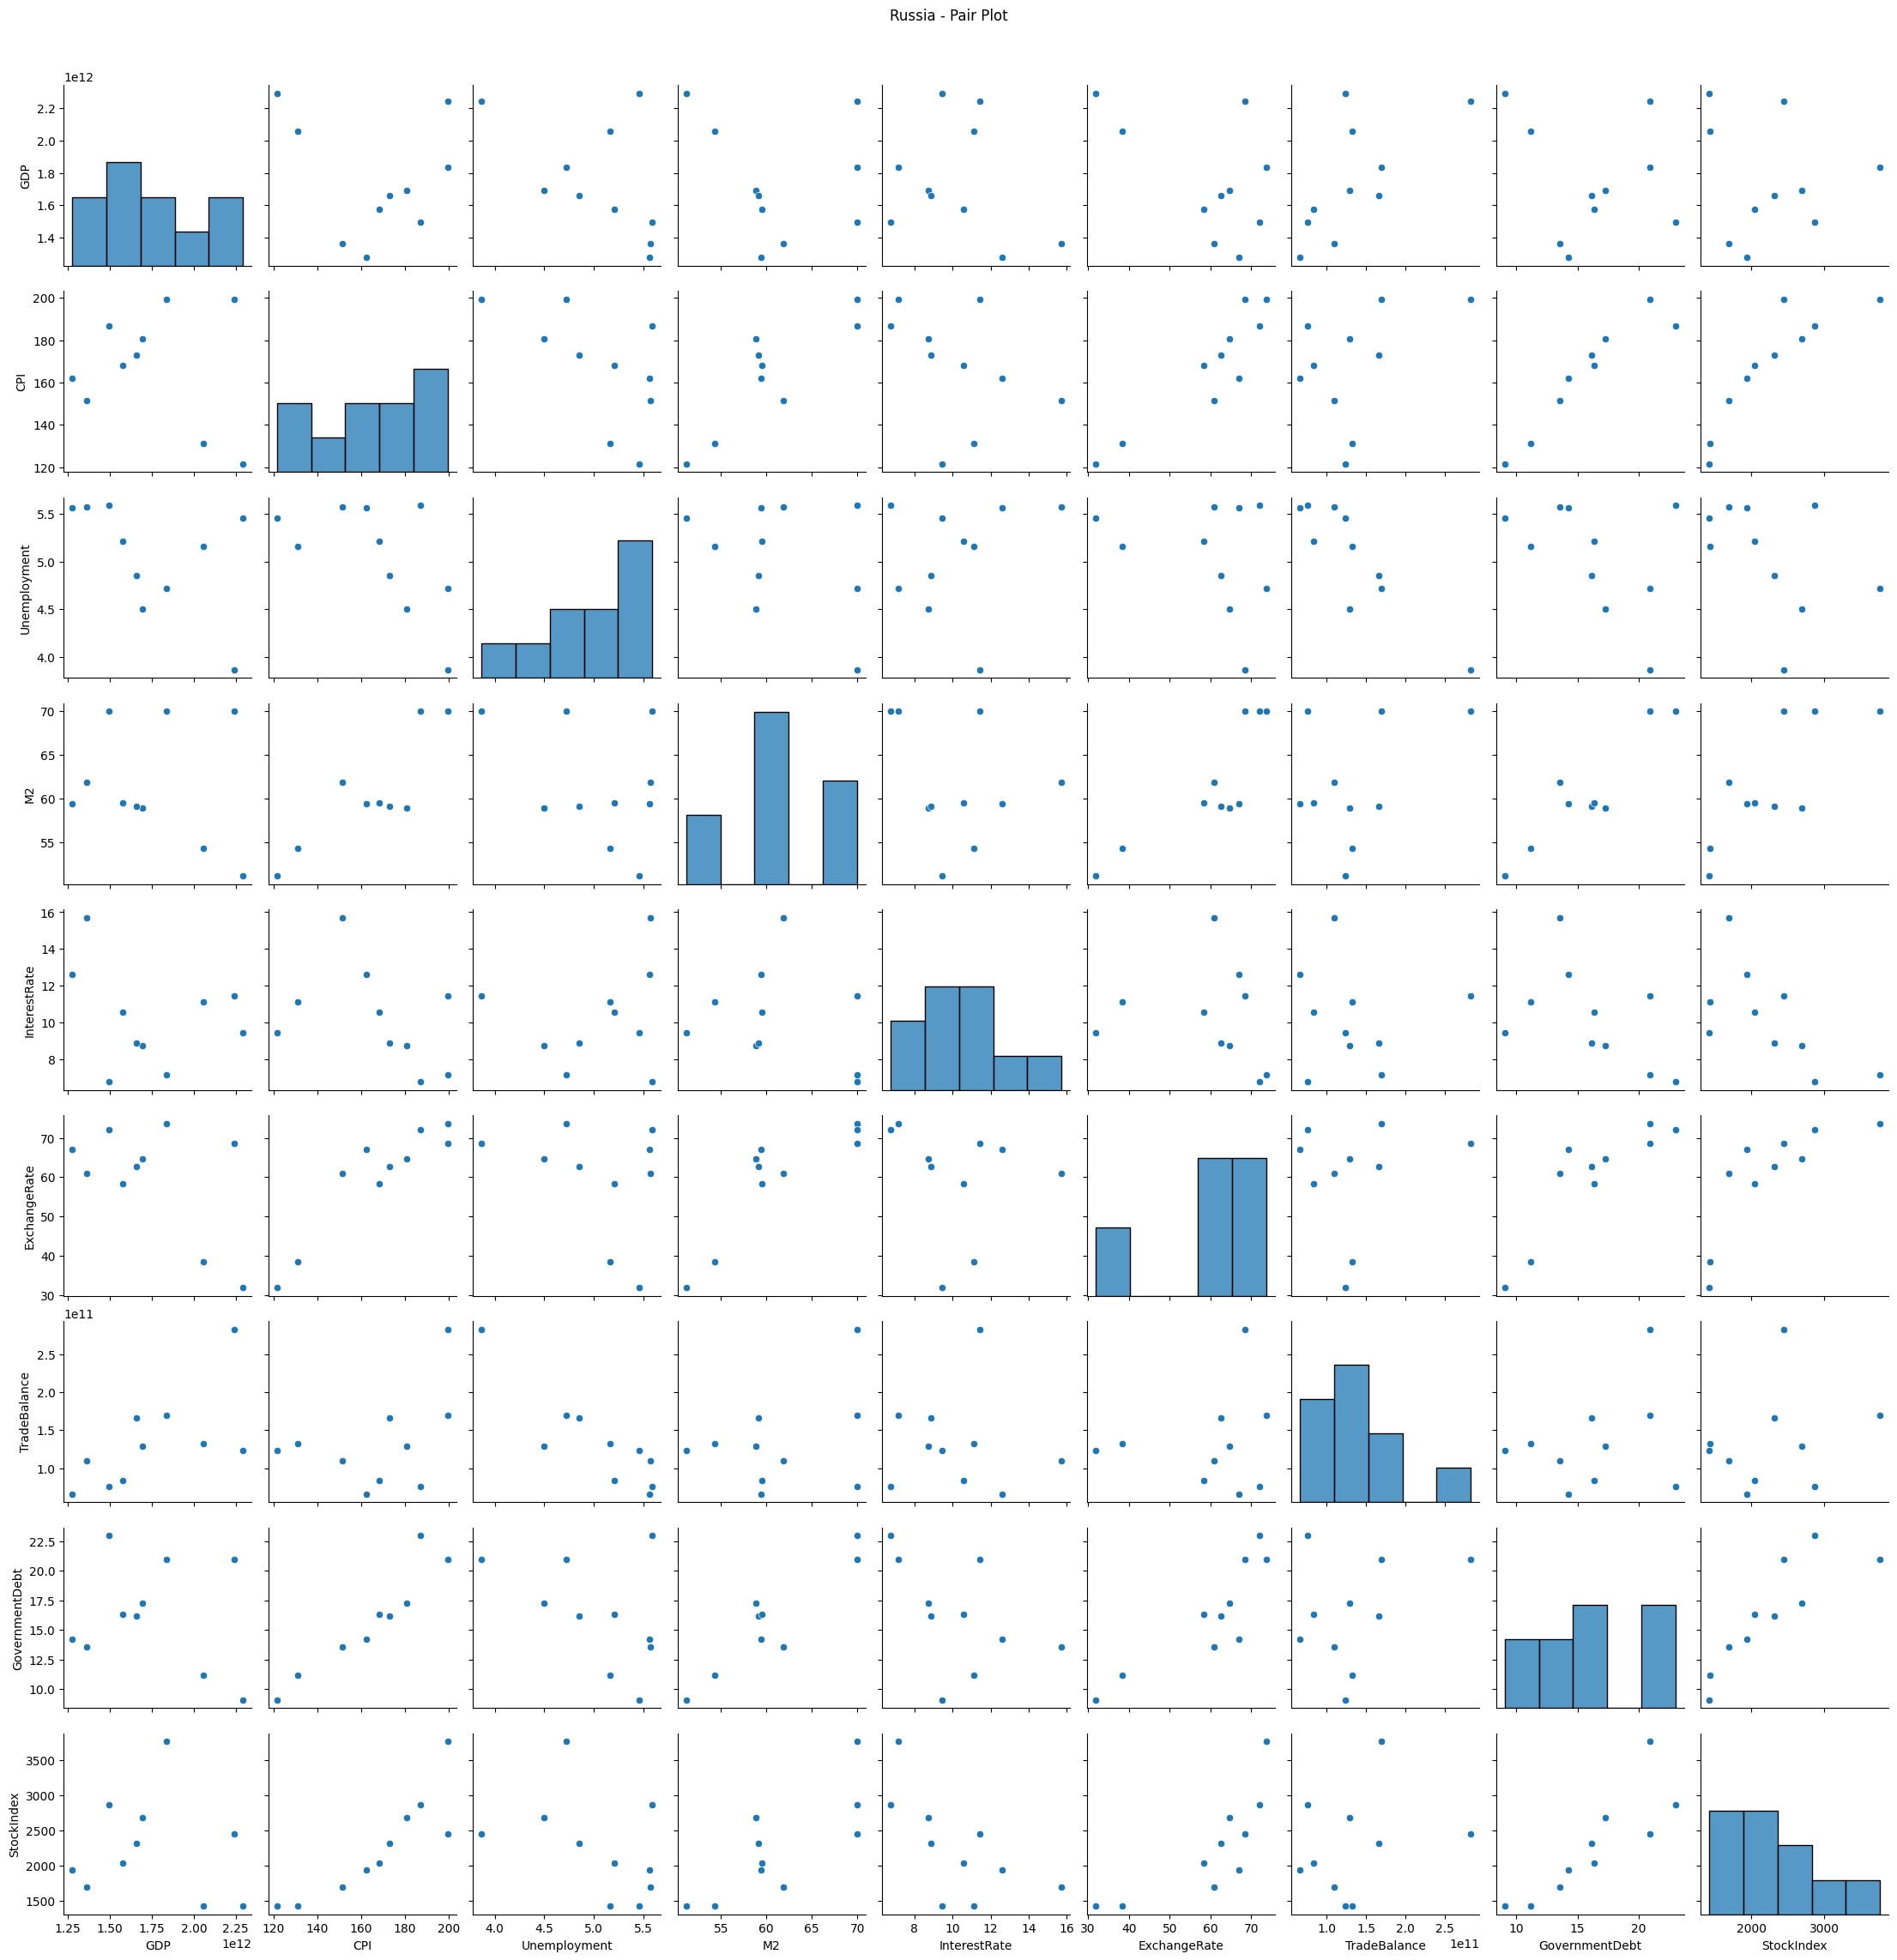

Data for India loaded successfully.


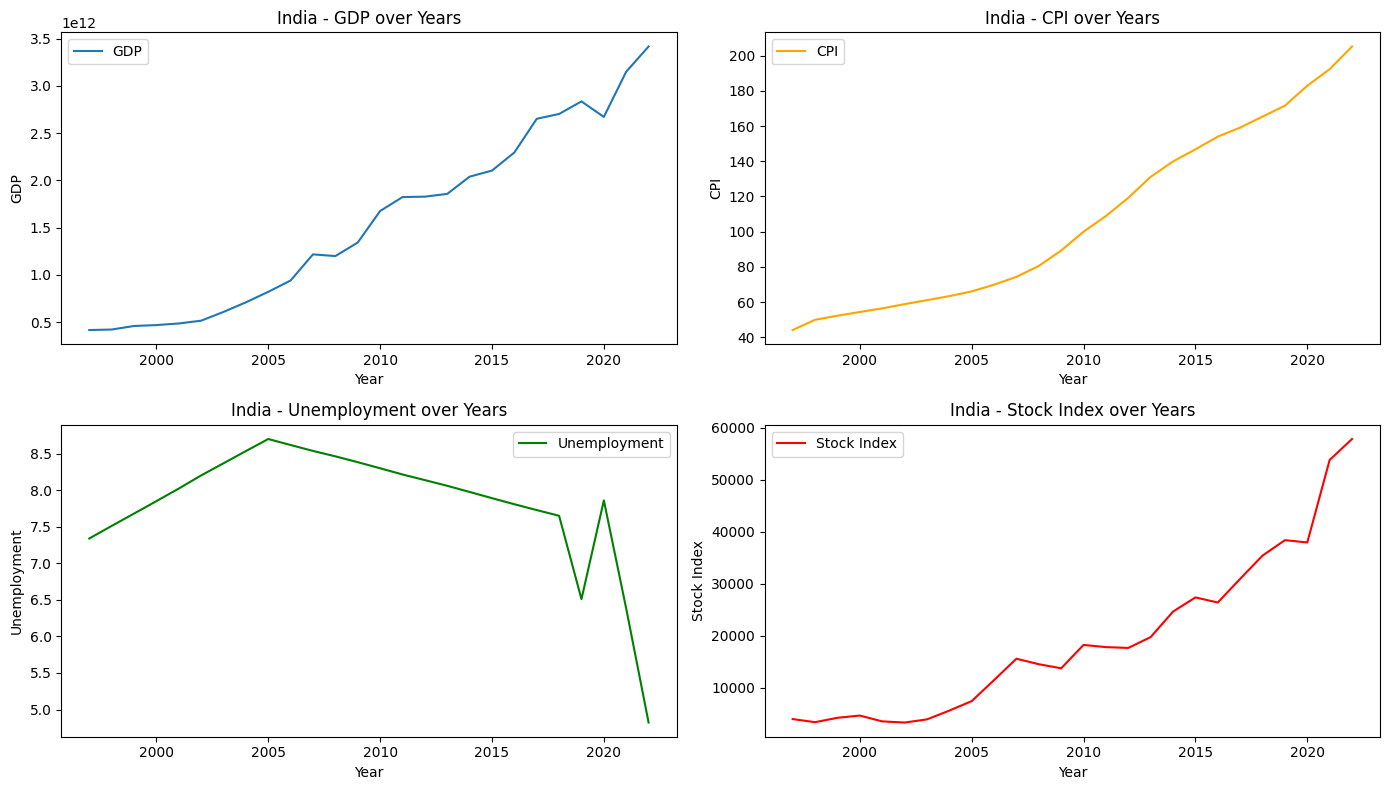

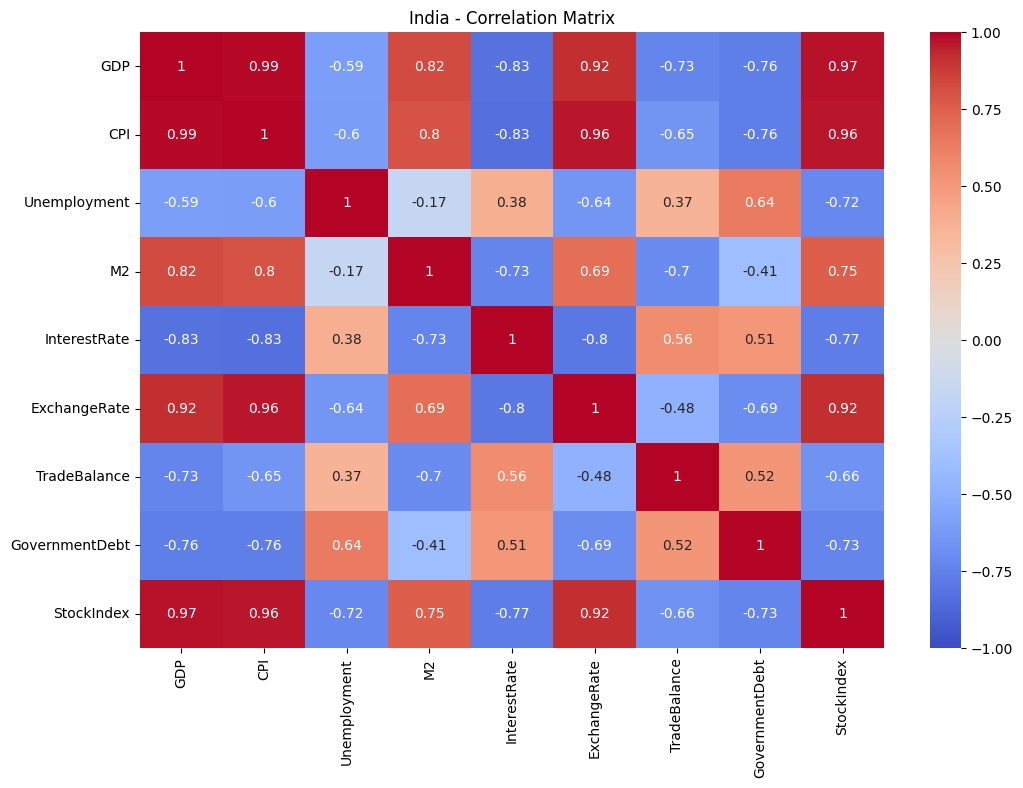

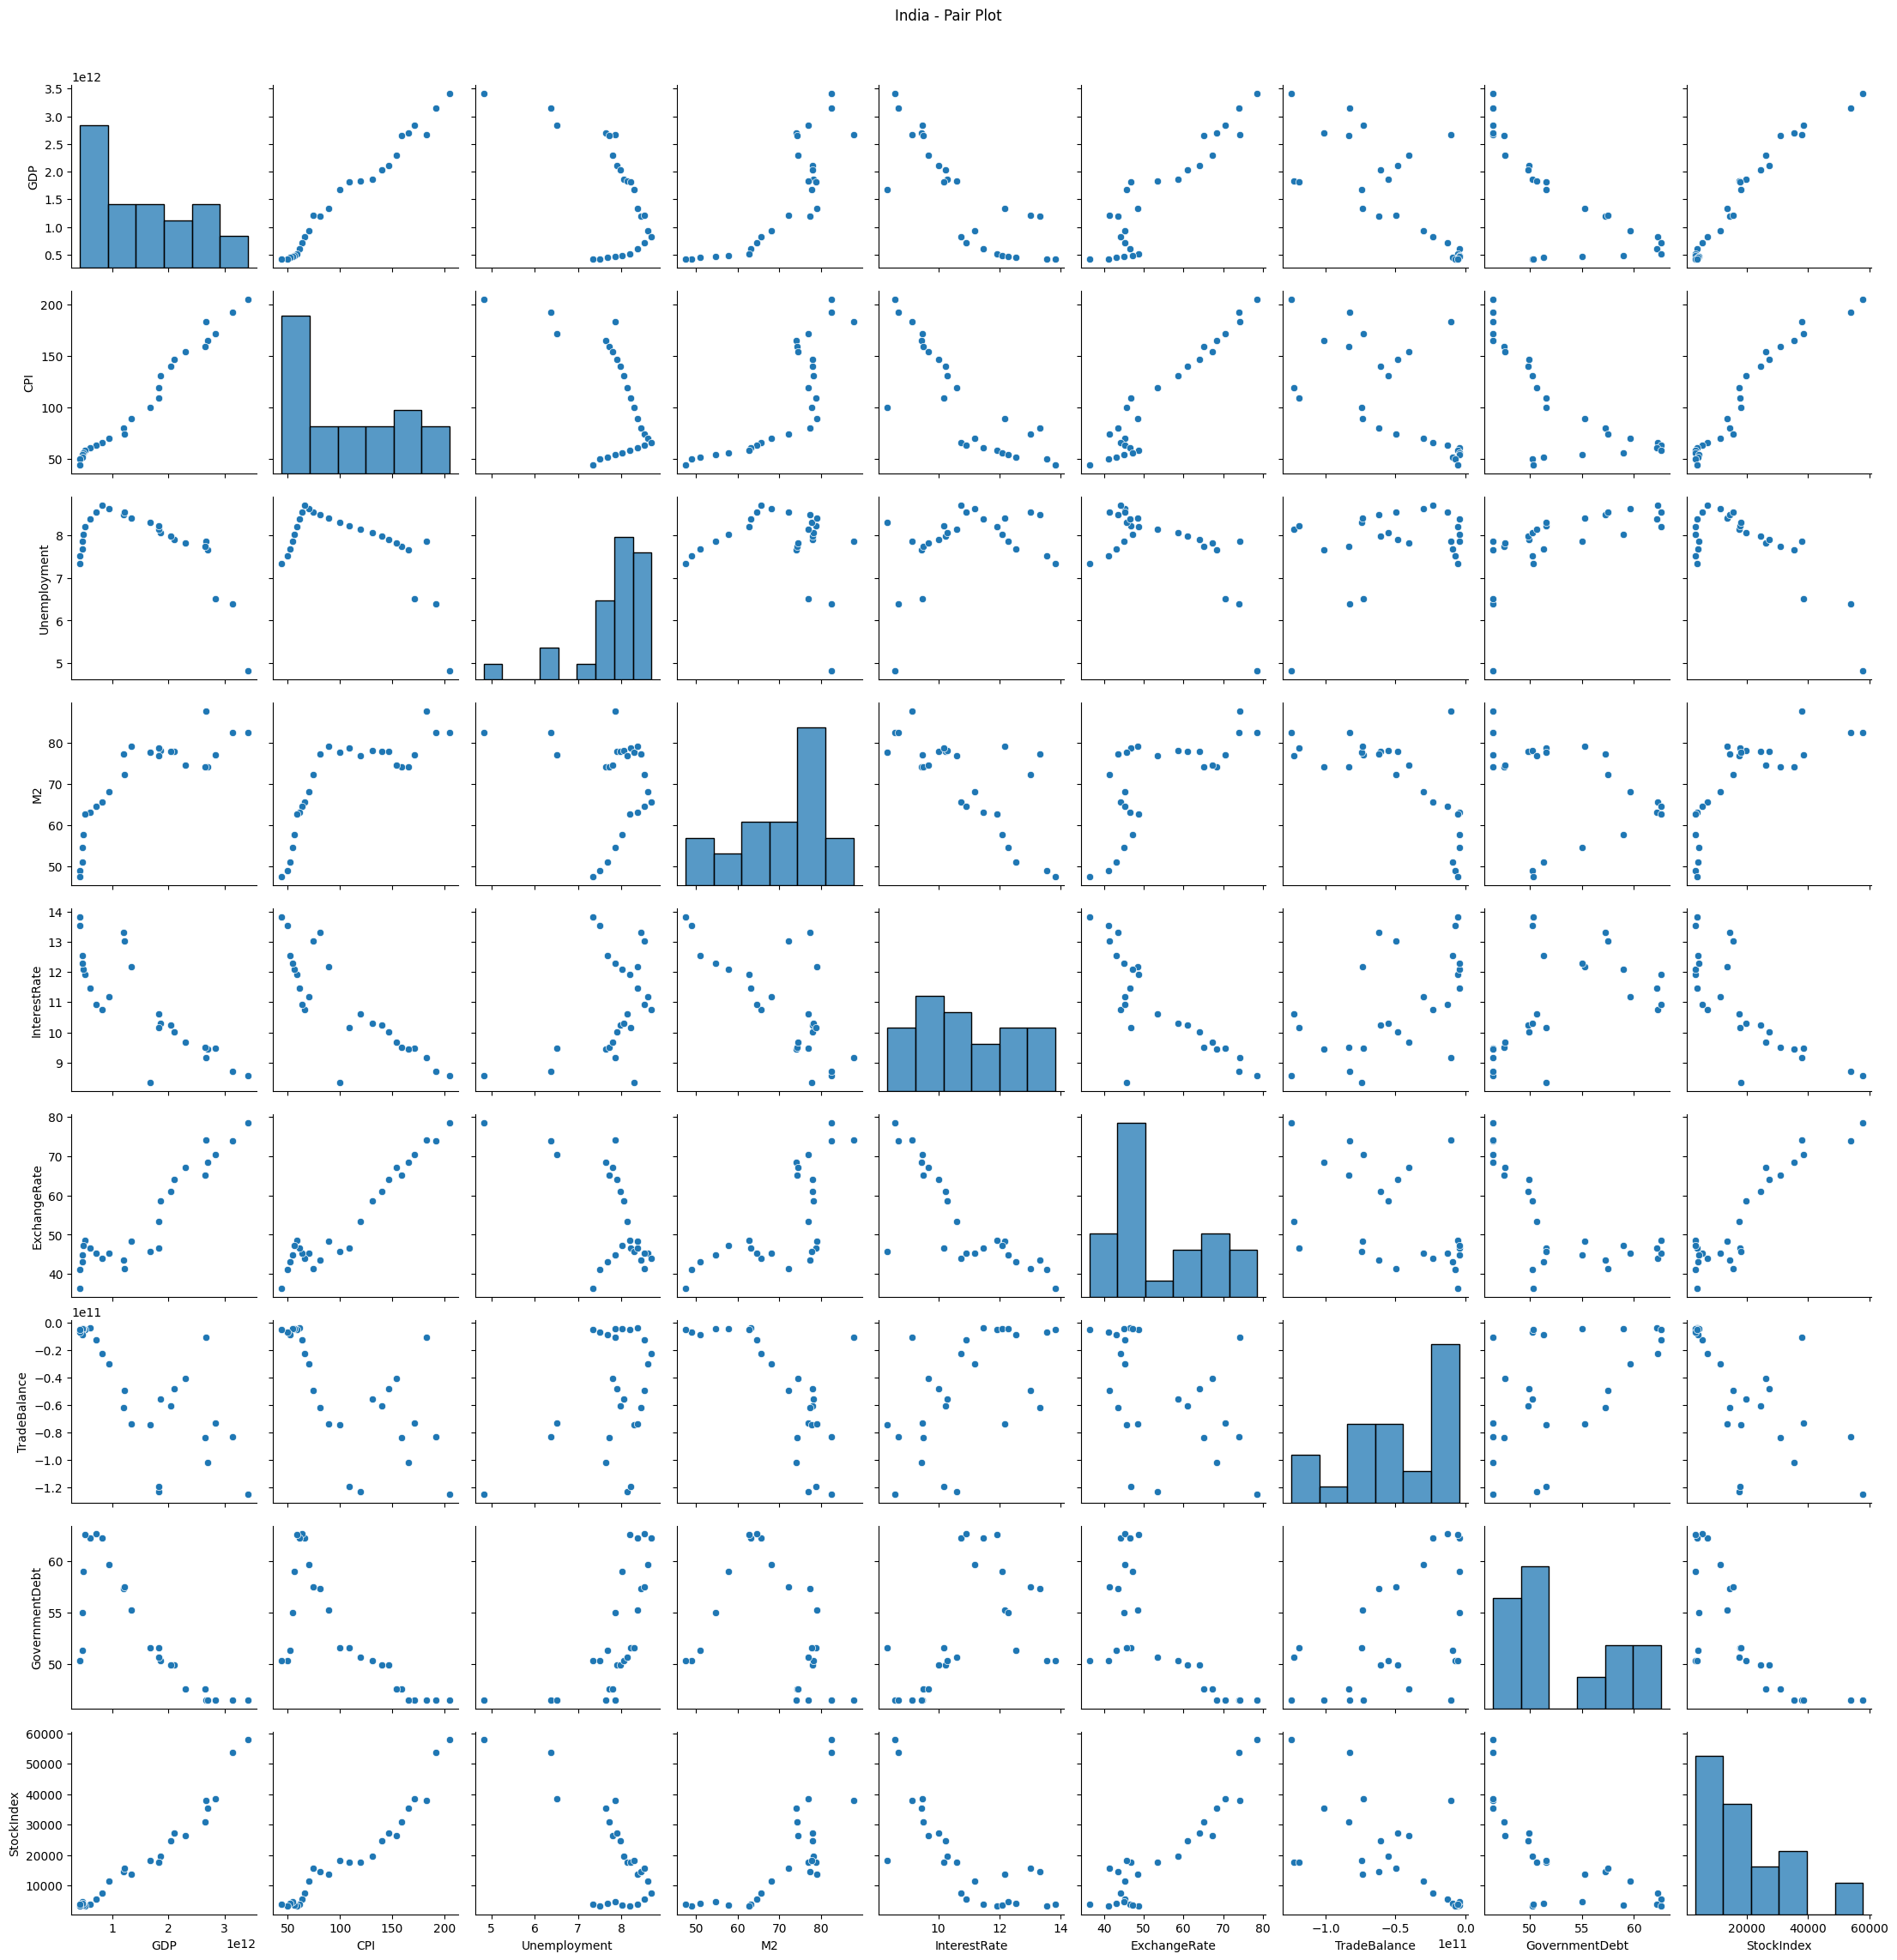

Data for China loaded successfully.


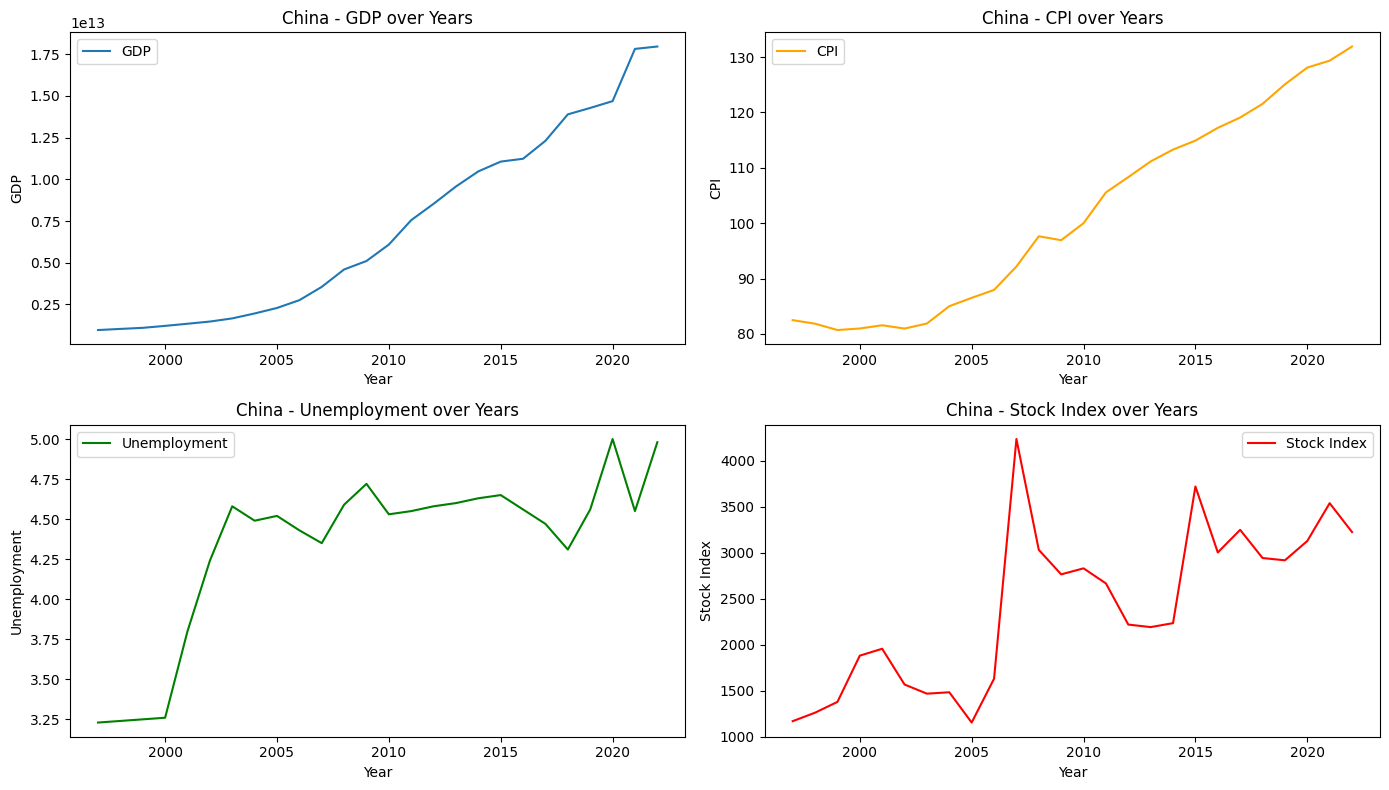

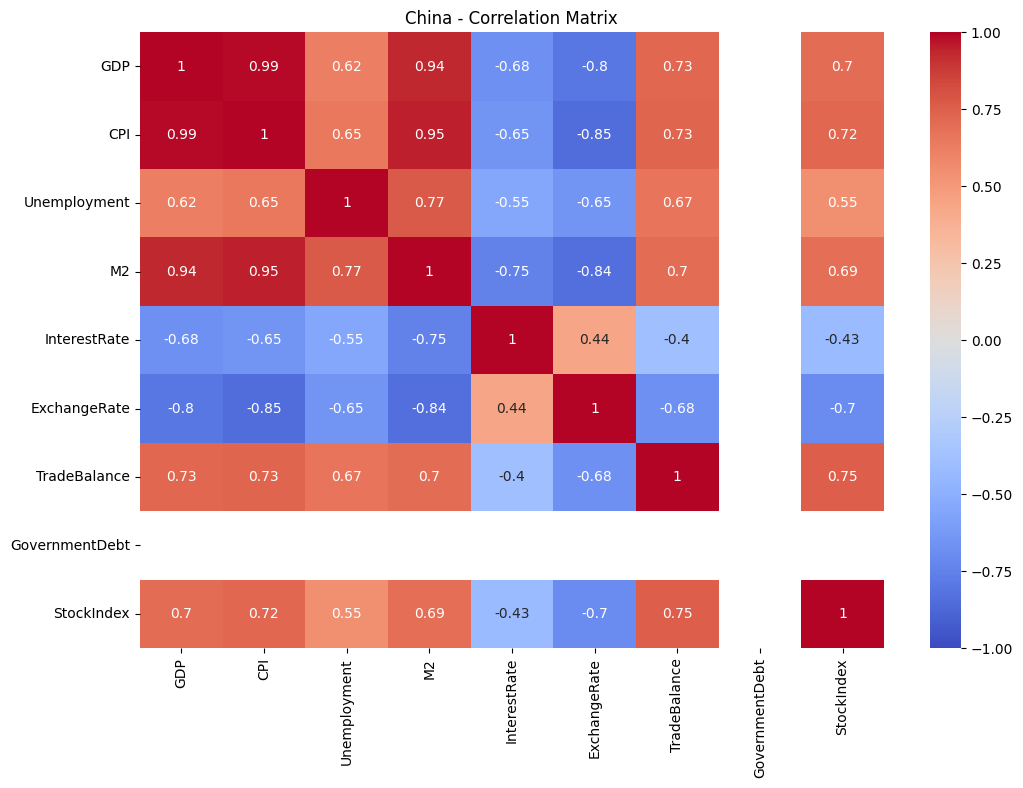

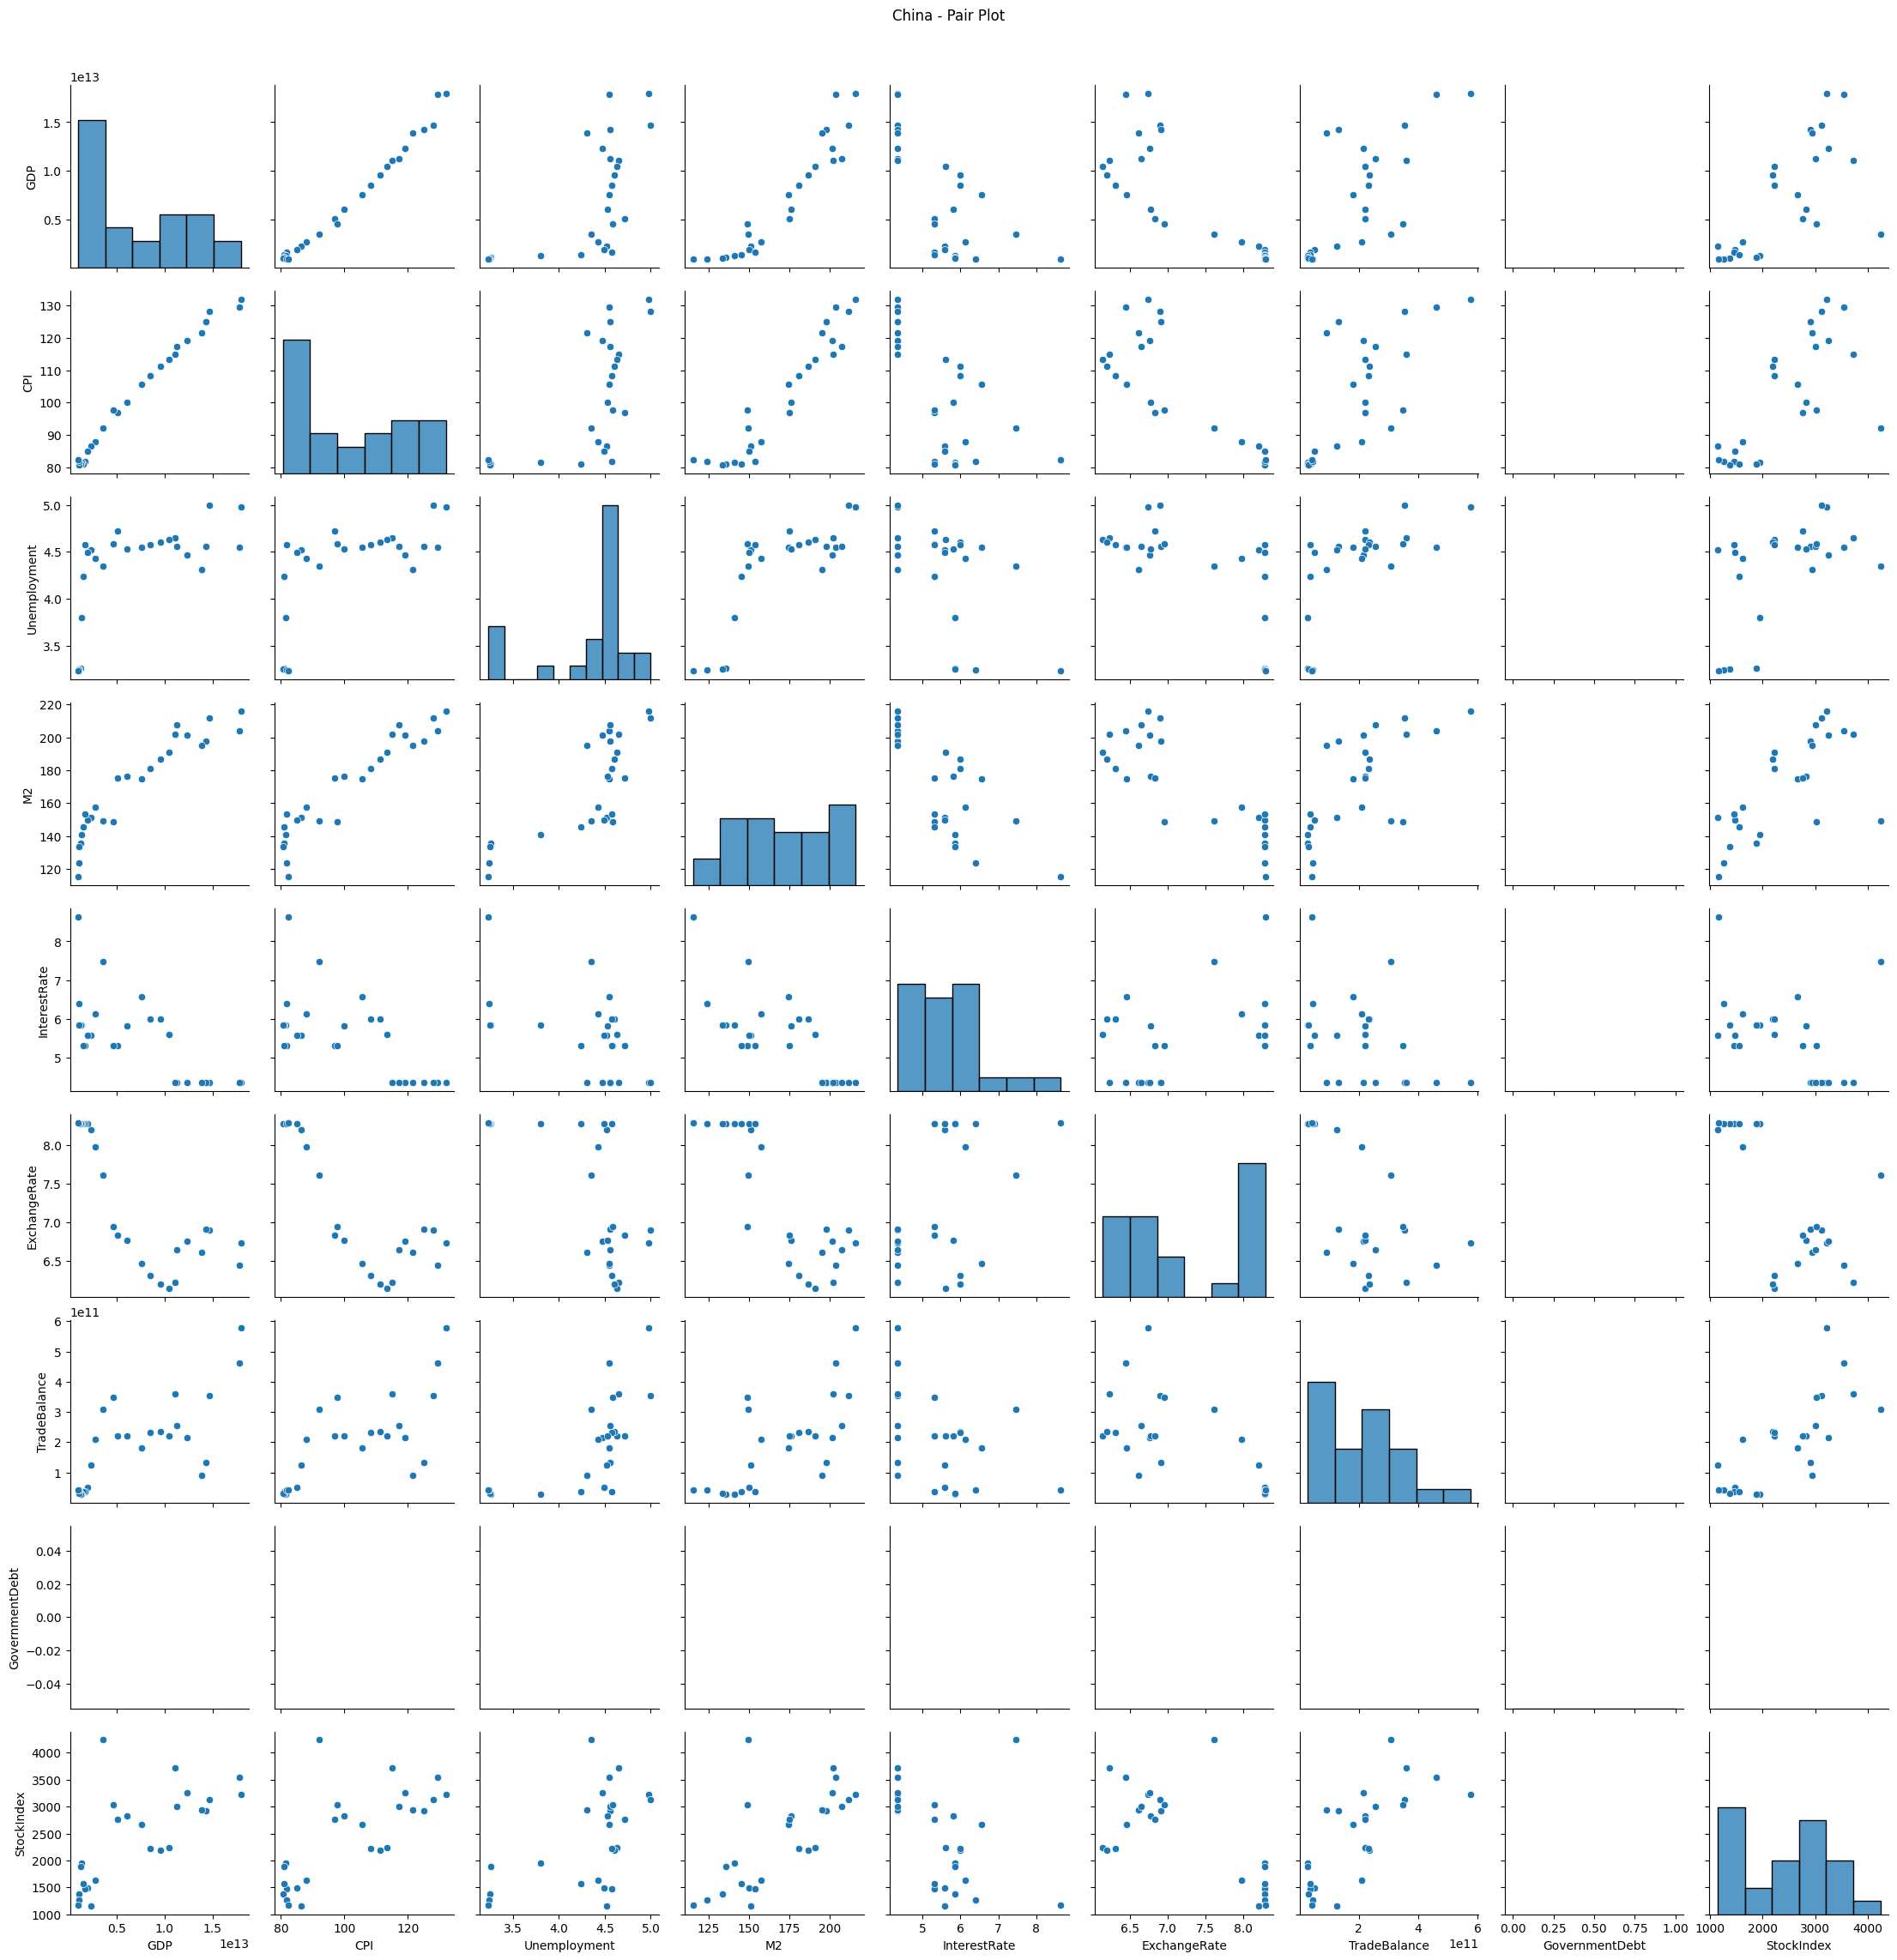

Data for South Africa loaded successfully.


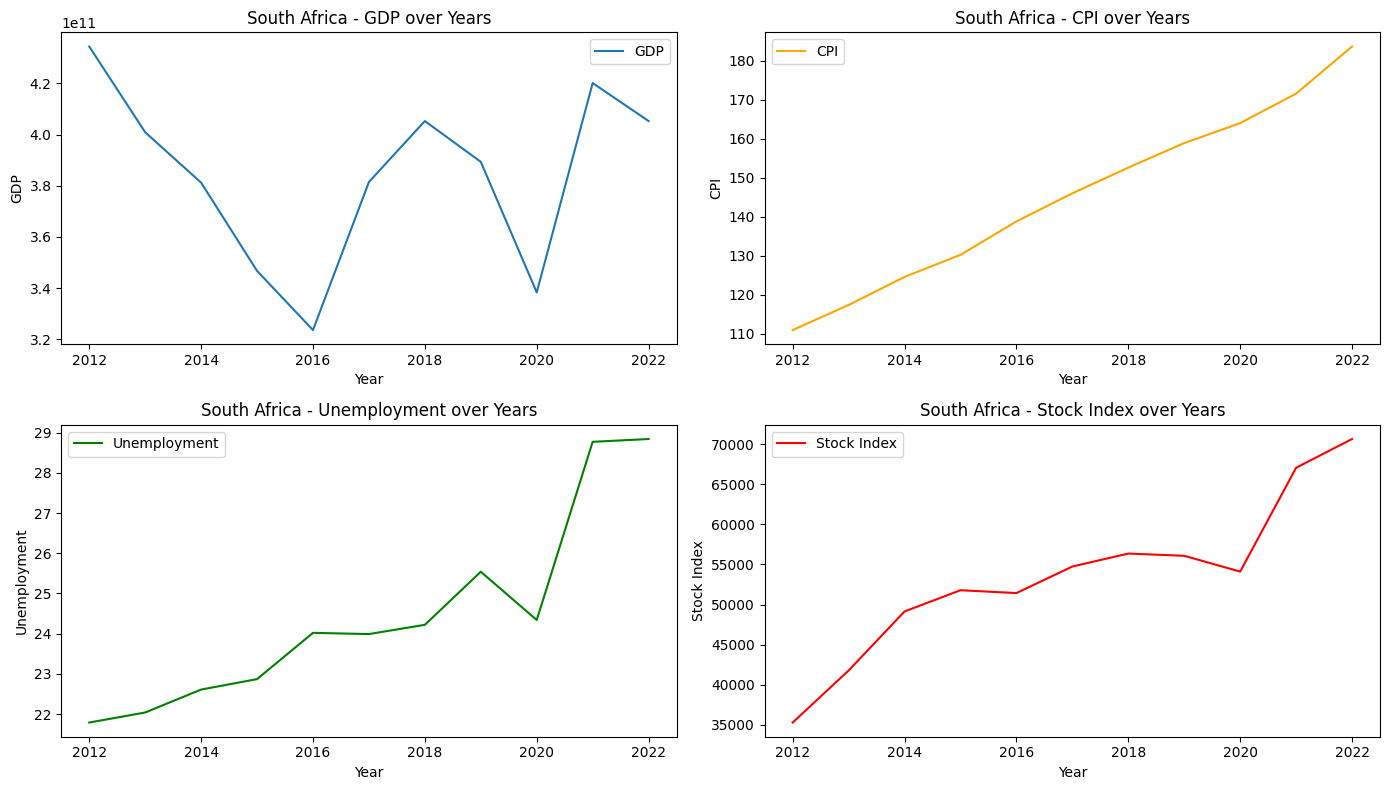

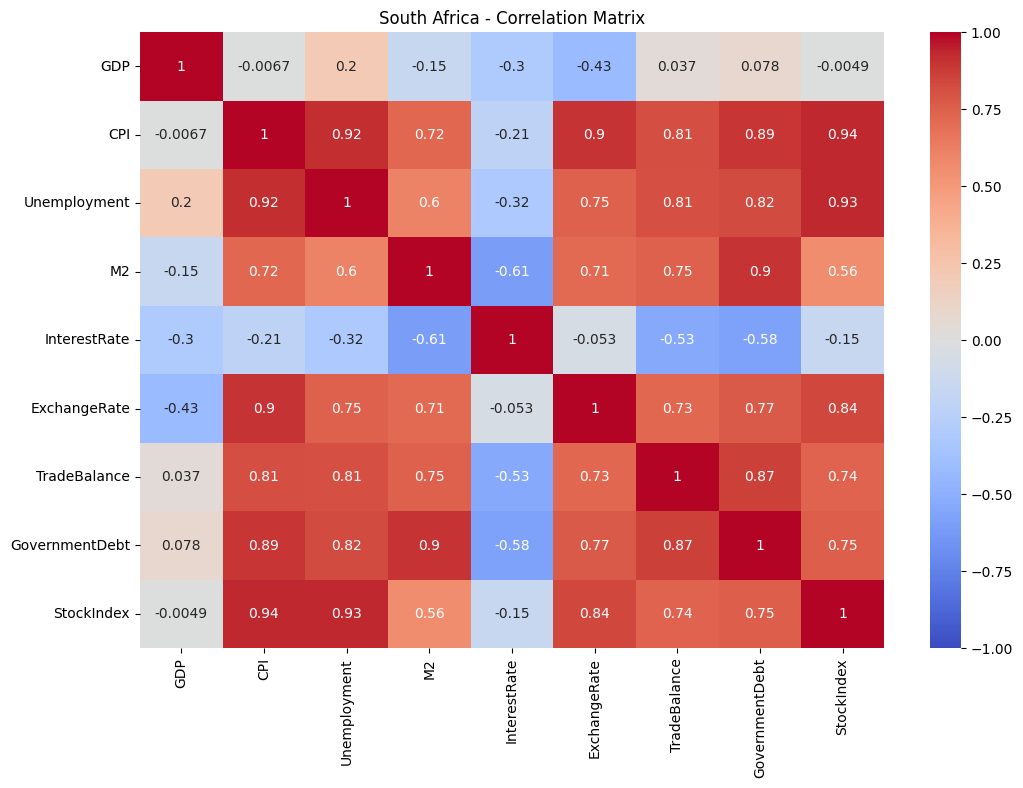

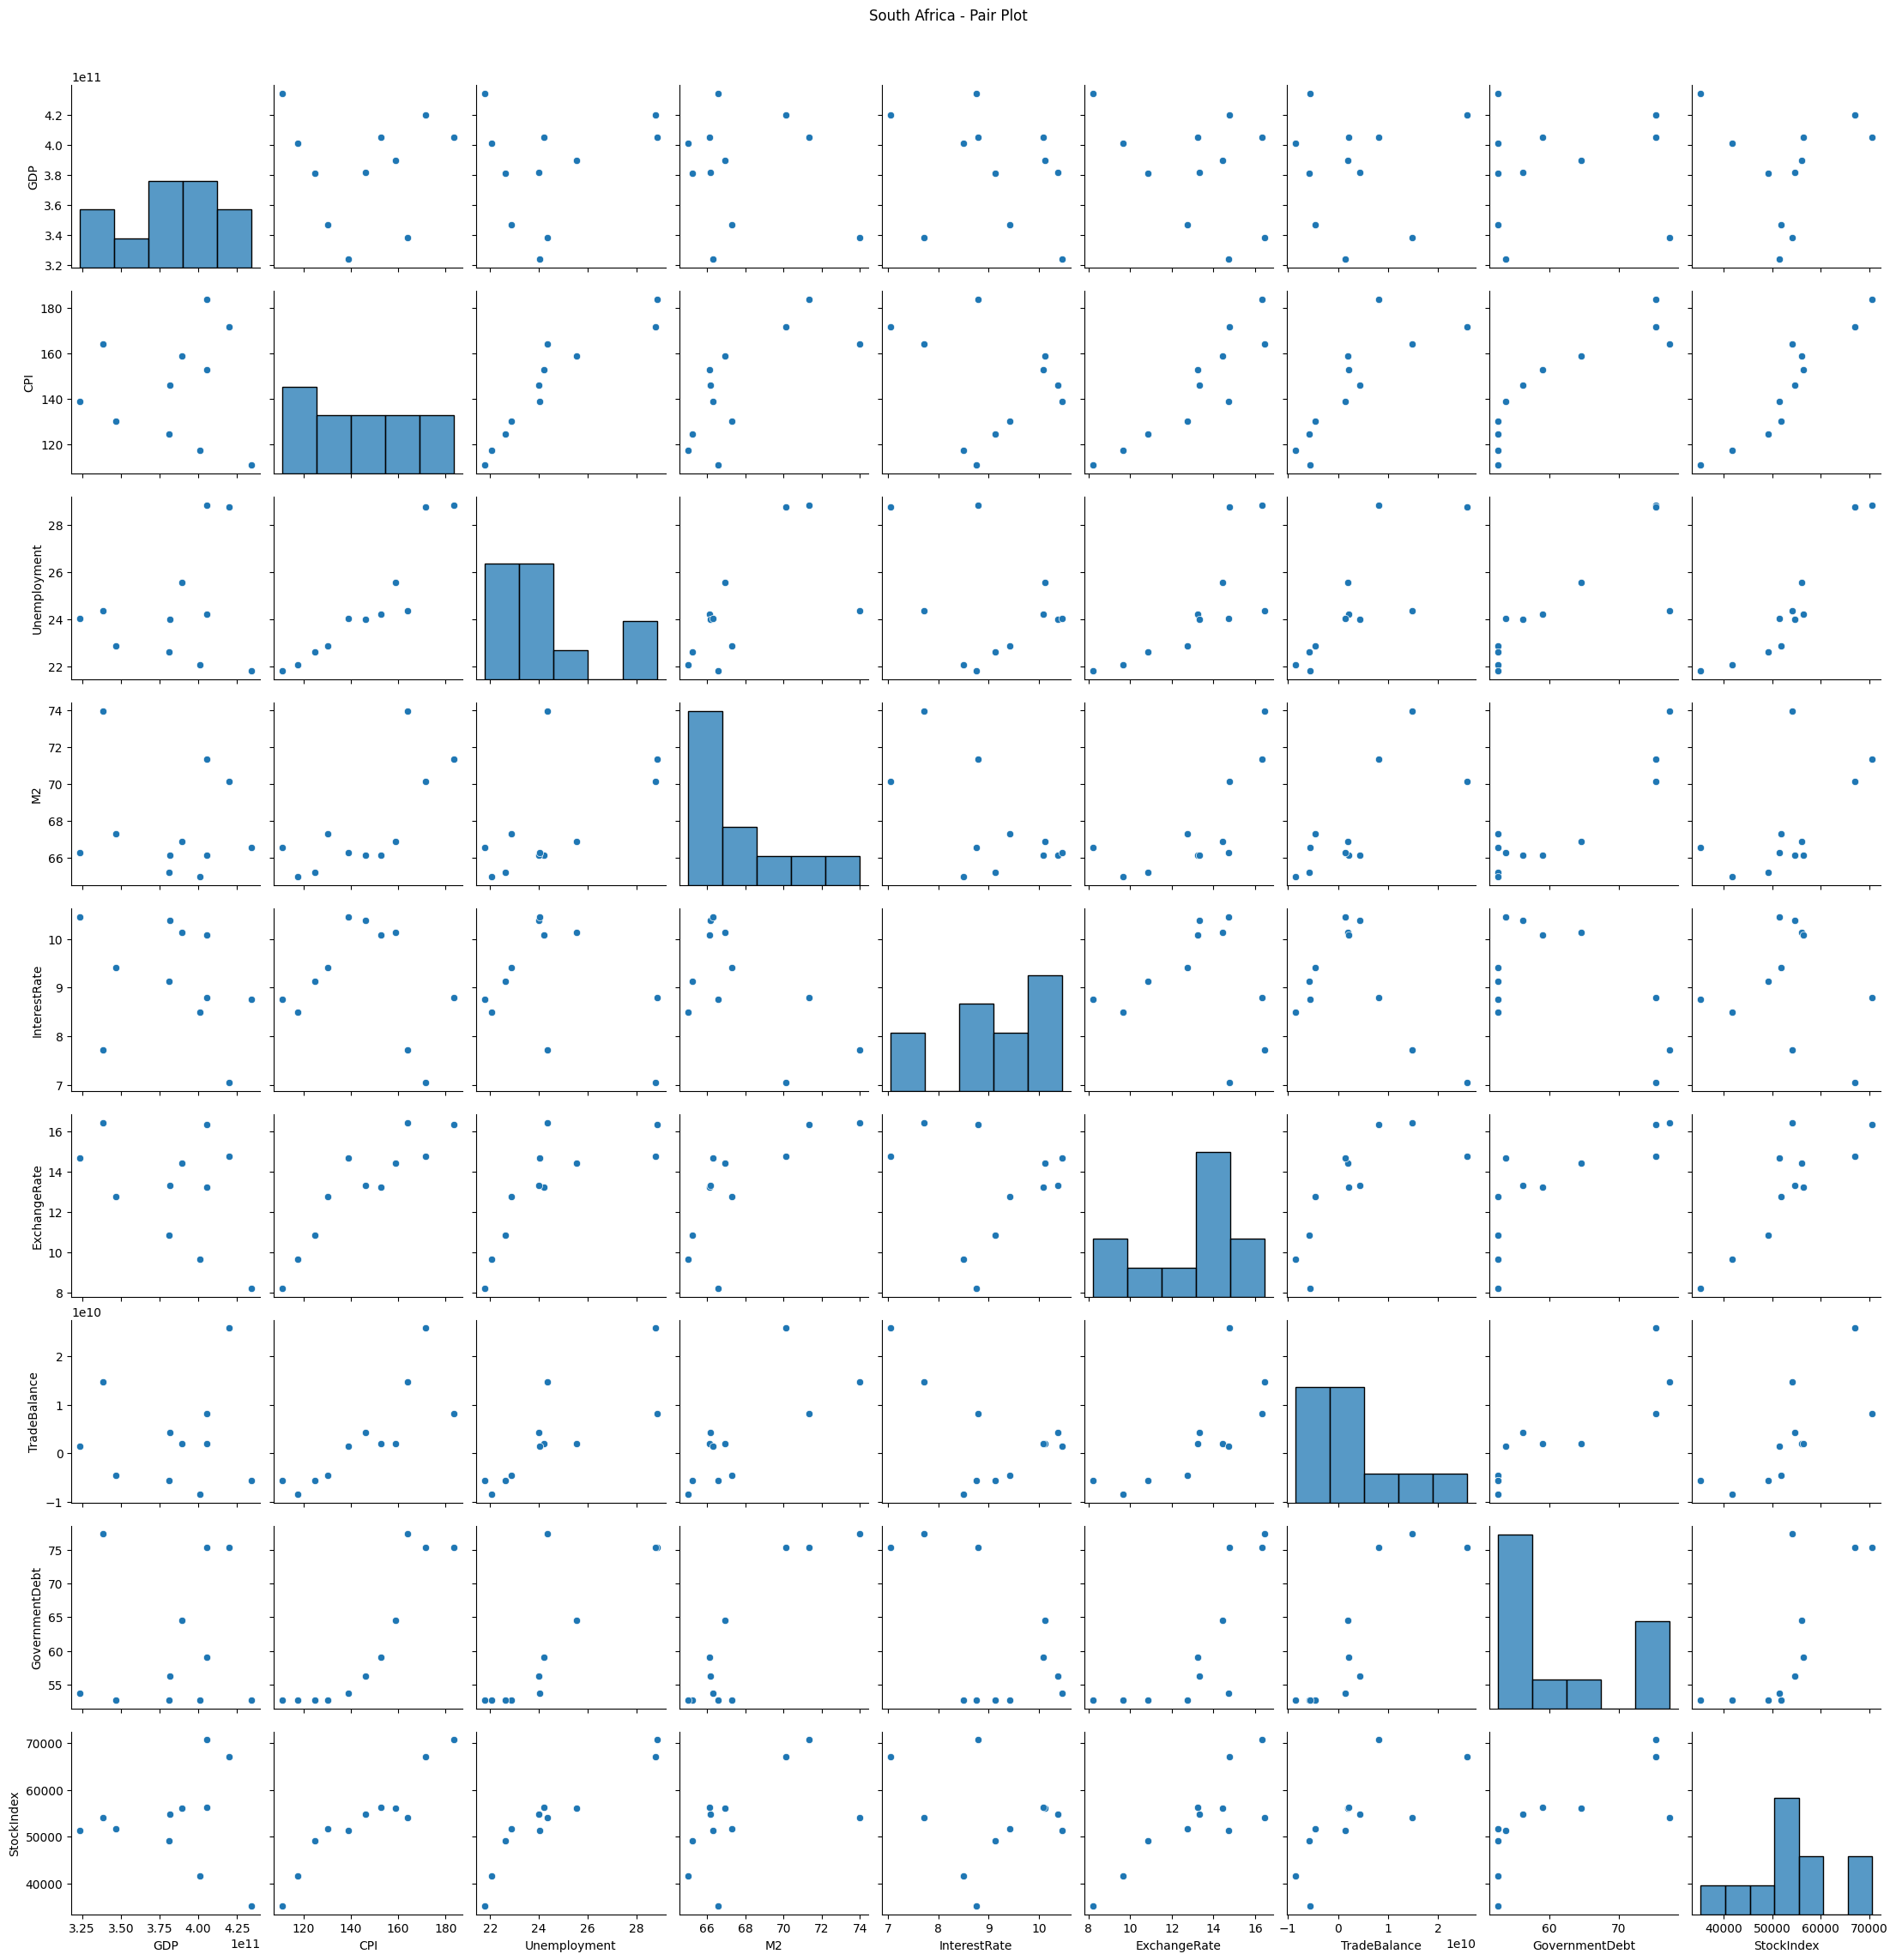

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Список стран BRICS
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Загрузка данных и создание графиков для каждой страны
for country in brics_countries:
    # Загрузка данных для страны
    try:
        data = pd.read_csv(f'{country}_macro_stock_data.csv')
        print(f"Data for {country} loaded successfully.")
    except FileNotFoundError:
        print(f"Data for {country} not found. Skipping.")
        continue

    # Построение графиков

    # 1. Линейный график для макроэкономических показателей и фондового индекса
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    plt.plot(data['Year'], data['GDP'], label='GDP')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title(f'{country} - GDP over Years')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(data['Year'], data['CPI'], label='CPI', color='orange')
    plt.xlabel('Year')
    plt.ylabel('CPI')
    plt.title(f'{country} - CPI over Years')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(data['Year'], data['Unemployment'], label='Unemployment', color='green')
    plt.xlabel('Year')
    plt.ylabel('Unemployment')
    plt.title(f'{country} - Unemployment over Years')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(data['Year'], data['StockIndex'], label='Stock Index', color='red')
    plt.xlabel('Year')
    plt.ylabel('Stock Index')
    plt.title(f'{country} - Stock Index over Years')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 2. Корреляционная матрица и тепловая карта
    plt.figure(figsize=(12, 8))
    corr_matrix = data.drop(columns=['Year']).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{country} - Correlation Matrix')
    plt.show()

    # 3. Парный график для всех переменных
    sns.pairplot(data.drop(columns=['Year']))
    plt.suptitle(f'{country} - Pair Plot', y=1.02)
    plt.show()


# Correlation *Analysis*

Корреляционный анализ для Brazil


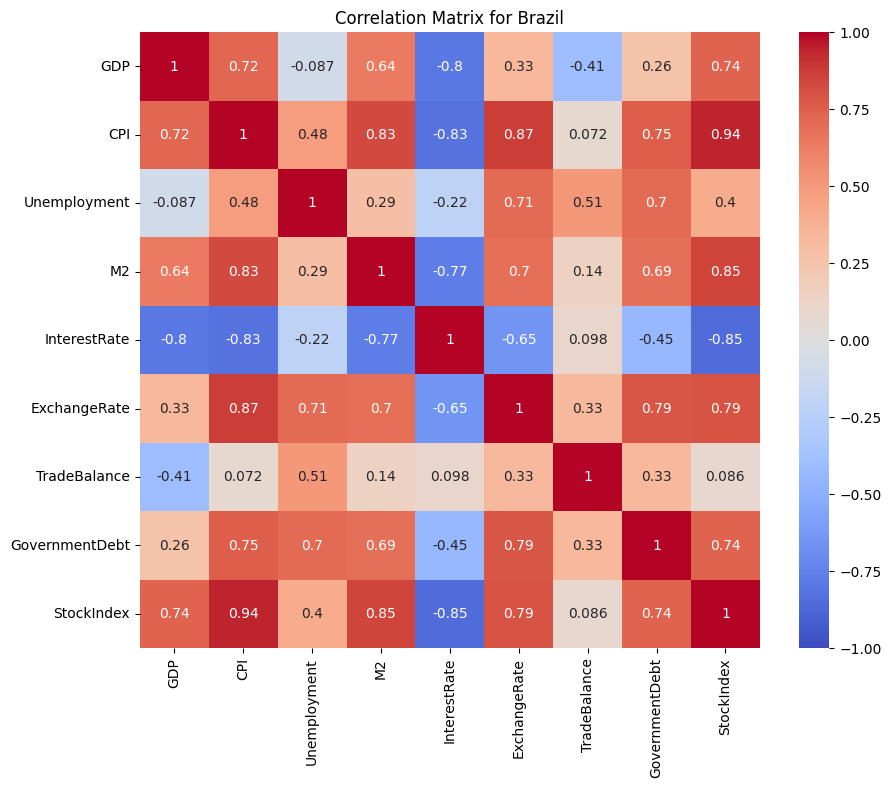

                     GDP       CPI  Unemployment        M2  InterestRate  \
GDP             1.000000  0.724400     -0.087497  0.636400     -0.795263   
CPI             0.724400  1.000000      0.478371  0.828420     -0.825009   
Unemployment   -0.087497  0.478371      1.000000  0.293499     -0.216392   
M2              0.636400  0.828420      0.293499  1.000000     -0.773233   
InterestRate   -0.795263 -0.825009     -0.216392 -0.773233      1.000000   
ExchangeRate    0.334852  0.874908      0.708406  0.695051     -0.653108   
TradeBalance   -0.407423  0.072079      0.507771  0.135210      0.098371   
GovernmentDebt  0.261585  0.750350      0.704351  0.687051     -0.445171   
StockIndex      0.739148  0.944440      0.402890  0.845961     -0.852476   

                ExchangeRate  TradeBalance  GovernmentDebt  StockIndex  
GDP                 0.334852     -0.407423        0.261585    0.739148  
CPI                 0.874908      0.072079        0.750350    0.944440  
Unemployment        

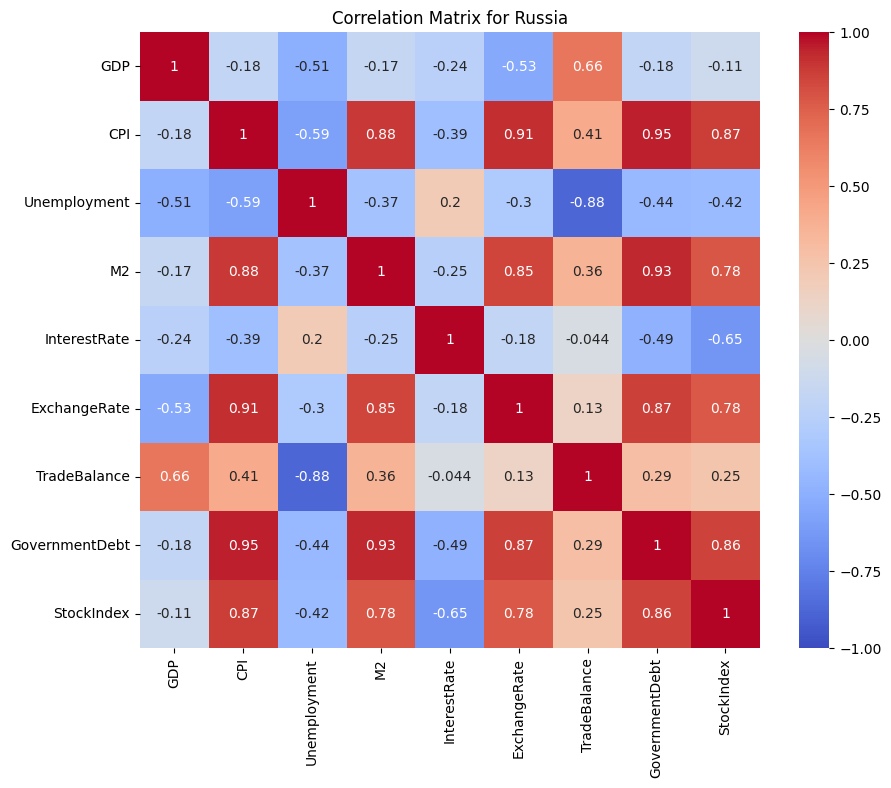

                     GDP       CPI  Unemployment        M2  InterestRate  \
GDP             1.000000 -0.182995     -0.507792 -0.169573     -0.235695   
CPI            -0.182995  1.000000     -0.592041  0.883970     -0.393099   
Unemployment   -0.507792 -0.592041      1.000000 -0.372009      0.196911   
M2             -0.169573  0.883970     -0.372009  1.000000     -0.250989   
InterestRate   -0.235695 -0.393099      0.196911 -0.250989      1.000000   
ExchangeRate   -0.534581  0.914921     -0.299578  0.851357     -0.180898   
TradeBalance    0.663620  0.406477     -0.881959  0.360358     -0.043562   
GovernmentDebt -0.180001  0.949241     -0.437253  0.932233     -0.485350   
StockIndex     -0.113914  0.873027     -0.423845  0.782210     -0.648142   

                ExchangeRate  TradeBalance  GovernmentDebt  StockIndex  
GDP                -0.534581      0.663620       -0.180001   -0.113914  
CPI                 0.914921      0.406477        0.949241    0.873027  
Unemployment       -

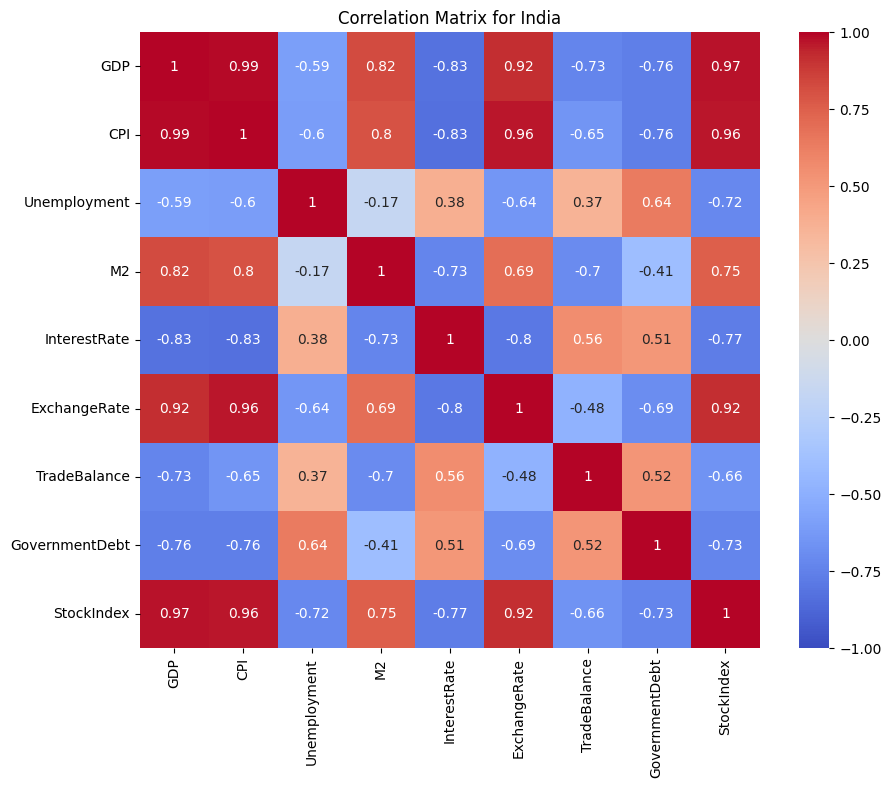

                     GDP       CPI  Unemployment        M2  InterestRate  \
GDP             1.000000  0.988814     -0.594524  0.822646     -0.826715   
CPI             0.988814  1.000000     -0.604872  0.799331     -0.829006   
Unemployment   -0.594524 -0.604872      1.000000 -0.170151      0.383150   
M2              0.822646  0.799331     -0.170151  1.000000     -0.728593   
InterestRate   -0.826715 -0.829006      0.383150 -0.728593      1.000000   
ExchangeRate    0.921751  0.963298     -0.640963  0.689315     -0.795322   
TradeBalance   -0.730864 -0.649731      0.366986 -0.696371      0.561900   
GovernmentDebt -0.757855 -0.764828      0.636577 -0.406052      0.508738   
StockIndex      0.969308  0.963204     -0.716354  0.752310     -0.771759   

                ExchangeRate  TradeBalance  GovernmentDebt  StockIndex  
GDP                 0.921751     -0.730864       -0.757855    0.969308  
CPI                 0.963298     -0.649731       -0.764828    0.963204  
Unemployment       -

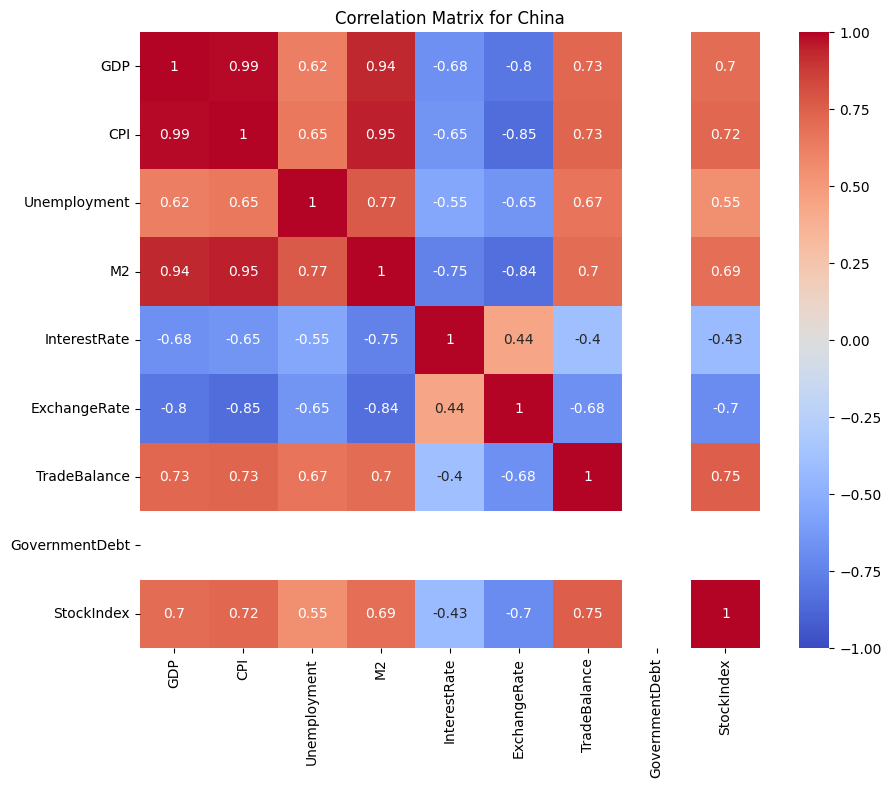

                     GDP       CPI  Unemployment        M2  InterestRate  \
GDP             1.000000  0.991460      0.617349  0.935726     -0.676836   
CPI             0.991460  1.000000      0.650653  0.946100     -0.651238   
Unemployment    0.617349  0.650653      1.000000  0.772112     -0.553336   
M2              0.935726  0.946100      0.772112  1.000000     -0.748113   
InterestRate   -0.676836 -0.651238     -0.553336 -0.748113      1.000000   
ExchangeRate   -0.802145 -0.846678     -0.653183 -0.837062      0.439322   
TradeBalance    0.725339  0.733505      0.665298  0.701091     -0.397923   
GovernmentDebt       NaN       NaN           NaN       NaN           NaN   
StockIndex      0.695488  0.721161      0.550572  0.693235     -0.425012   

                ExchangeRate  TradeBalance  GovernmentDebt  StockIndex  
GDP                -0.802145      0.725339             NaN    0.695488  
CPI                -0.846678      0.733505             NaN    0.721161  
Unemployment       -

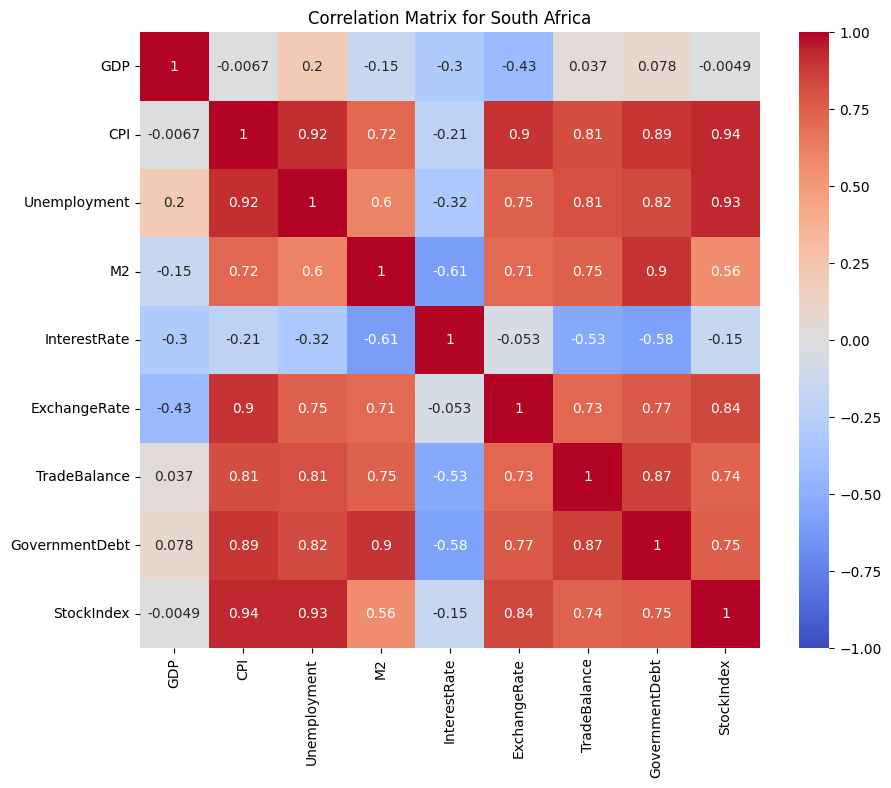

                     GDP       CPI  Unemployment        M2  InterestRate  \
GDP             1.000000 -0.006748      0.203572 -0.154116     -0.298837   
CPI            -0.006748  1.000000      0.918603  0.724701     -0.213928   
Unemployment    0.203572  0.918603      1.000000  0.602686     -0.318471   
M2             -0.154116  0.724701      0.602686  1.000000     -0.608443   
InterestRate   -0.298837 -0.213928     -0.318471 -0.608443      1.000000   
ExchangeRate   -0.429458  0.904218      0.747459  0.714710     -0.052762   
TradeBalance    0.037282  0.813214      0.805988  0.747813     -0.531641   
GovernmentDebt  0.078345  0.894336      0.823730  0.904184     -0.578520   
StockIndex     -0.004894  0.935529      0.930677  0.558376     -0.154270   

                ExchangeRate  TradeBalance  GovernmentDebt  StockIndex  
GDP                -0.429458      0.037282        0.078345   -0.004894  
CPI                 0.904218      0.813214        0.894336    0.935529  
Unemployment        

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для выполнения корреляционного анализа
def perform_correlation_analysis(data, country):
    # Вычисление корреляционной матрицы
    data = data.drop(columns=['Year'])
    correlation_matrix = data.corr()

    # Визуализация корреляционной матрицы
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {country}')
    plt.show()

    return correlation_matrix

# Список стран BRICS
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Проведение корреляционного анализа для каждой страны
for country in brics_countries:
    # Загрузка данных для страны
    data = pd.read_csv(f'{country}_macro_stock_data.csv')

    # Выполнение корреляционного анализа
    print(f"Корреляционный анализ для {country}")
    correlation_matrix = perform_correlation_analysis(data, country)
    print(correlation_matrix)


# Регрессионный анализ

Регрессионный анализ для Brazil
                            OLS Regression Results                            
Dep. Variable:             StockIndex   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     43.04
Date:                Mon, 27 May 2024   Prob (F-statistic):           2.60e-11
Time:                        05:09:14   Log-Likelihood:                -312.41
No. Observations:                  30   AIC:                             642.8
Df Residuals:                      21   BIC:                             655.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const       

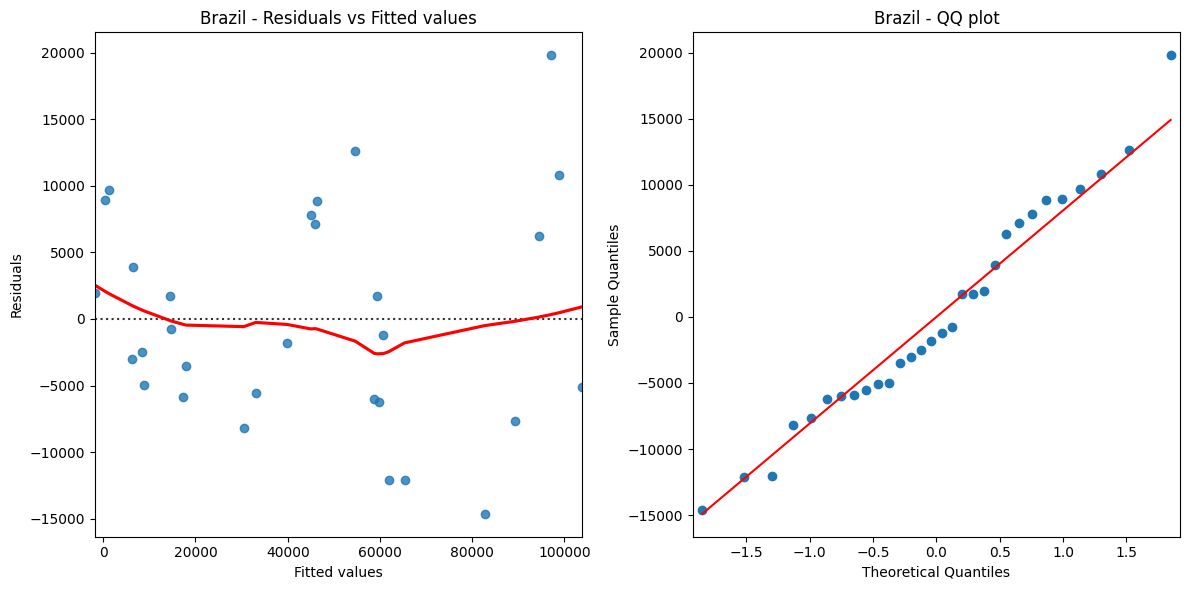

Статистически значимые переменные для Brazil: ['const', 'GovernmentDebt']
Регрессионный анализ для Russia
                            OLS Regression Results                            
Dep. Variable:             StockIndex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     12.61
Date:                Mon, 27 May 2024   Prob (F-statistic):              0.215
Time:                        05:09:15   Log-Likelihood:                -56.401
No. Observations:                  10   AIC:                             130.8
Df Residuals:                       1   BIC:                             133.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


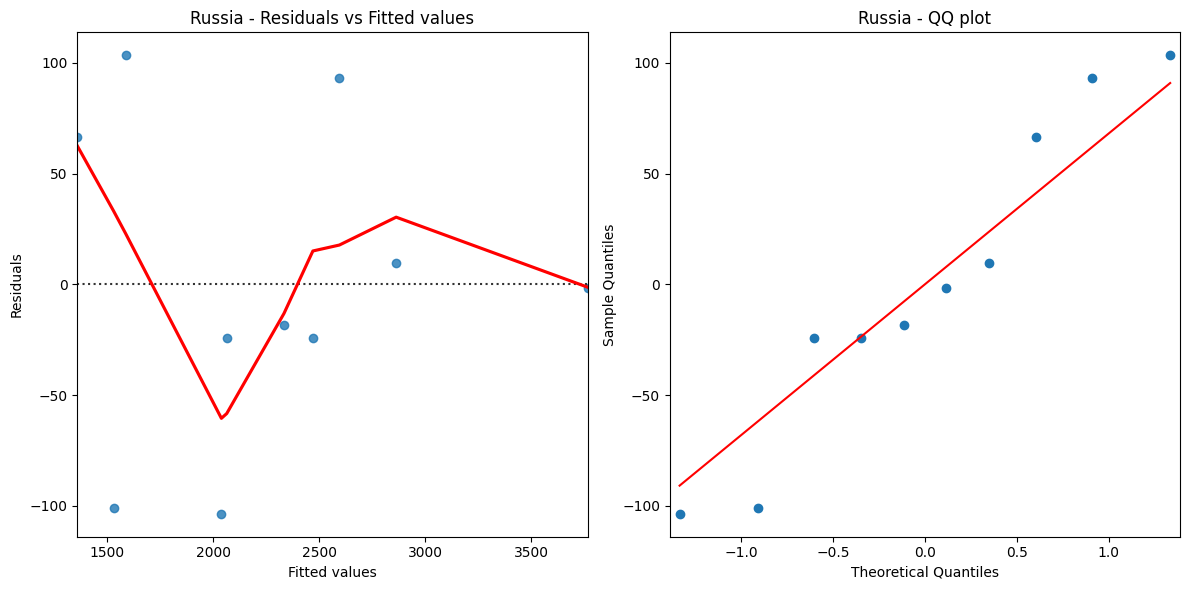

Статистически значимые переменные для Russia: ['const']
Регрессионный анализ для India
                            OLS Regression Results                            
Dep. Variable:             StockIndex   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     126.3
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.32e-13
Time:                        05:09:16   Log-Likelihood:                -234.07
No. Observations:                  26   AIC:                             486.1
Df Residuals:                      17   BIC:                             497.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

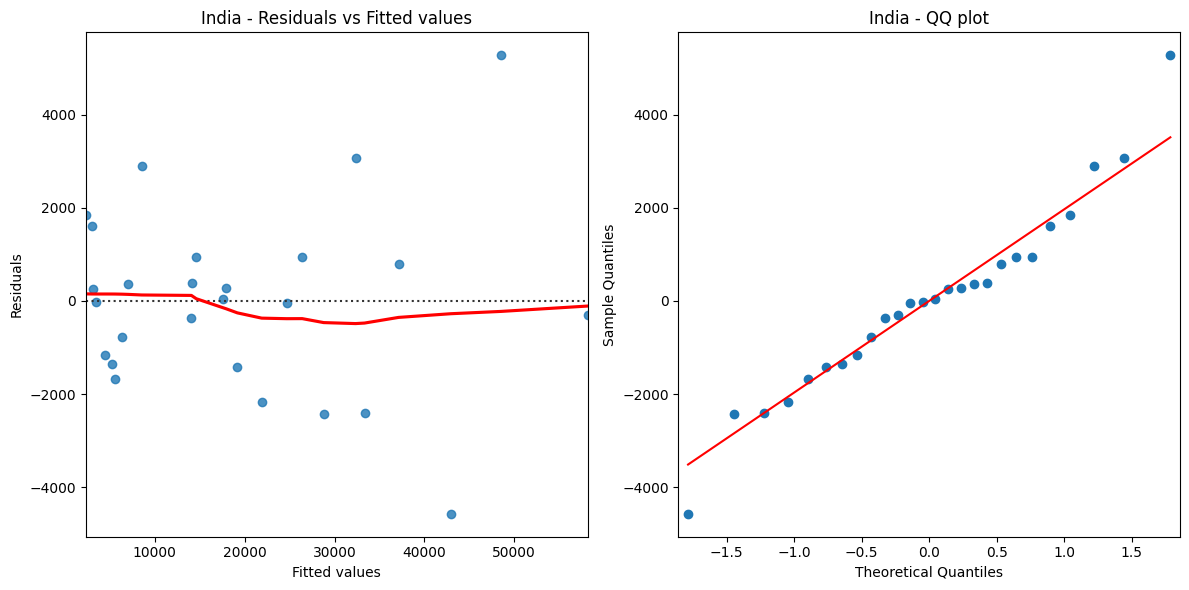

Статистически значимые переменные для India: ['const', 'GDP', 'Unemployment', 'TradeBalance']
Ошибка при анализе данных для China: Данные содержат NaN или бесконечные значения после обработки.
Регрессионный анализ для South Africa
                            OLS Regression Results                            
Dep. Variable:             StockIndex   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     235.8
Date:                Mon, 27 May 2024   Prob (F-statistic):            0.00423
Time:                        05:09:17   Log-Likelihood:                -78.679
No. Observations:                  11   AIC:                             175.4
Df Residuals:                       2   BIC:                             178.9
Df Model:                           8                                         
Covariance Type:            nonrobust                     

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


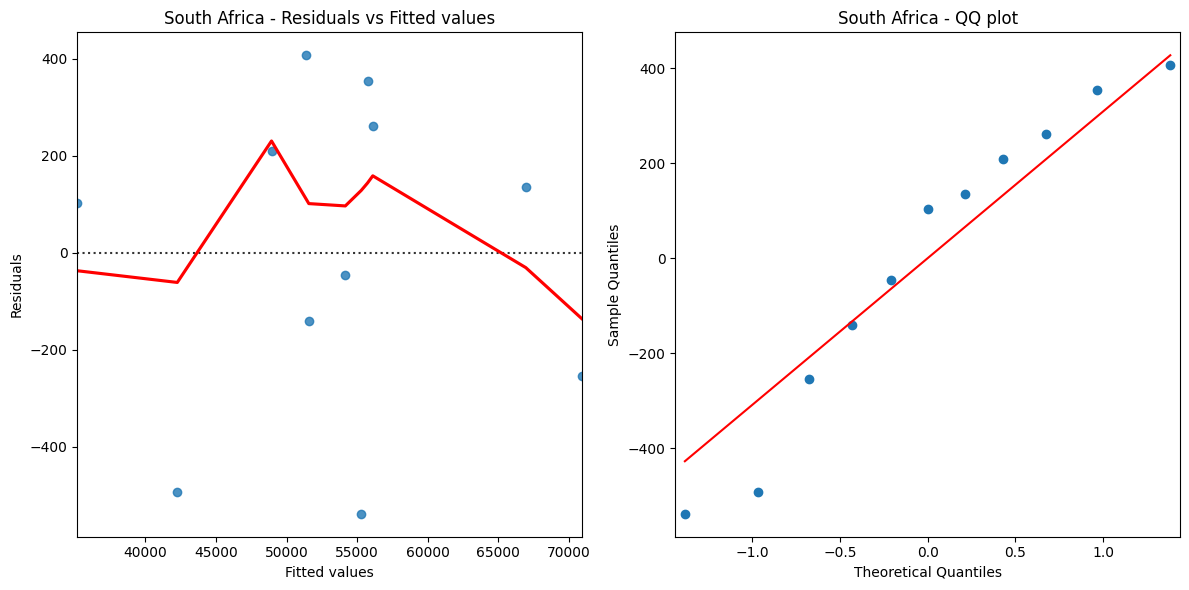

Статистически значимые переменные для South Africa: ['const', 'CPI', 'GovernmentDebt']


In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Функция для предварительной обработки данных
def preprocess_data(data):
    # Заполнение пропущенных значений ближайшими вперед и назад
    data = data.ffill().bfill()

    # Нормализация данных (исключая столбцы 'Year' и 'StockIndex')
    features = data.columns.difference(['Year', 'StockIndex'])
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])

    return data

# Функция для выполнения регрессионного анализа
def perform_regression_analysis(data, country):
    X = data.drop(columns=['Year', 'StockIndex'])
    y = data['StockIndex']

    # Добавление константы (Intercept) в модель
    X = sm.add_constant(X)

    # Проверка на наличие NaN или бесконечных значений после обработки
    if not np.isfinite(X).all().all() or not np.isfinite(y).all():
        raise ValueError("Данные содержат NaN или бесконечные значения после обработки.")

    # Построение модели
    model = sm.OLS(y, X).fit()

    # Вывод результатов
    print(f"Регрессионный анализ для {country}")
    print(model.summary())

    # Уравнение регрессии
    equation = "StockIndex = "
    for i, coef in enumerate(model.params):
        if i == 0:
            equation += f"{coef:.2f} + "
        else:
            equation += f"{coef:.2f} * {X.columns[i]} + "
    equation = equation.rstrip(" + ")
    print(f"Уравнение регрессии для {country}: {equation}\n")

    return model

# Функция для построения графиков
def plot_regression_results(model, data, country):
    # Построение графика остатков
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'{country} - Residuals vs Fitted values')

    # Построение графика QQ
    plt.subplot(1, 2, 2)
    sm.qqplot(model.resid, line='s', ax=plt.gca())
    plt.title(f'{country} - QQ plot')

    plt.tight_layout()
    plt.show()

# Список стран BRICS
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Проведение регрессионного анализа для каждой страны
for country in brics_countries:
    # Загрузка данных для страны
    try:
        data = pd.read_csv(f'{country}_macro_stock_data.csv')
    except FileNotFoundError:
        print(f"Data for {country} not found. Skipping.")
        continue

    # Предварительная обработка данных
    data = preprocess_data(data)

    # Проверка, есть ли данные после обработки
    if data.empty:
        print(f"Нет данных для анализа для {country}")
        continue

    # Выполнение регрессионного анализа
    try:
        model = perform_regression_analysis(data, country)

        # Построение графиков для регрессии
        plot_regression_results(model, data, country)

        # Проверка статистической значимости регрессоров
        significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
        print(f"Статистически значимые переменные для {country}: {significant_vars}")

    except ValueError as e:
        print(f"Ошибка при анализе данных для {country}: {e}")


# ARMA

ADF Statistic for StockIndex: -6.107846194867326
p-value for StockIndex: 9.489329869044894e-08
Critical Values:
   1%: -5.354256481481482
Critical Values:
   5%: -3.6462381481481483
Critical Values:
   10%: -2.901197777777778


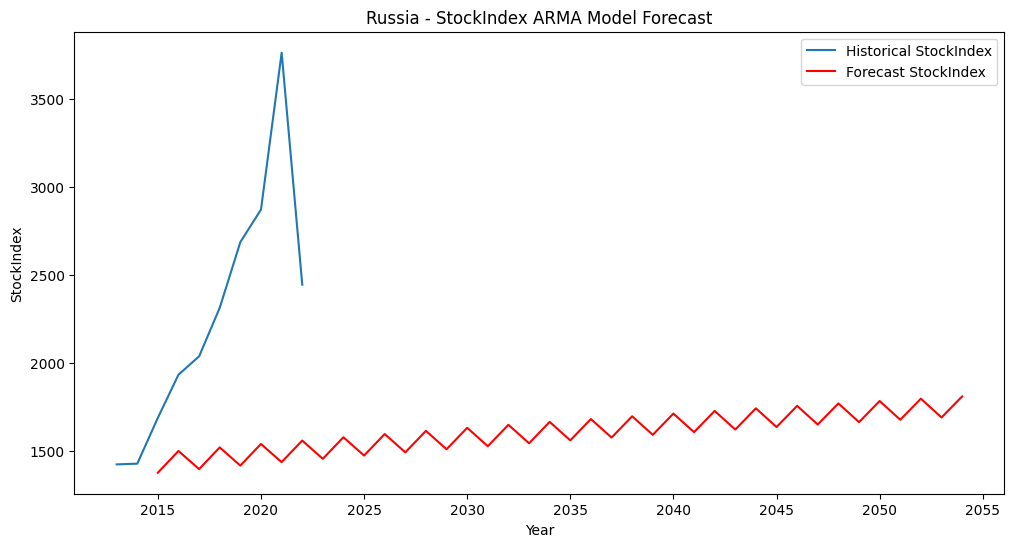

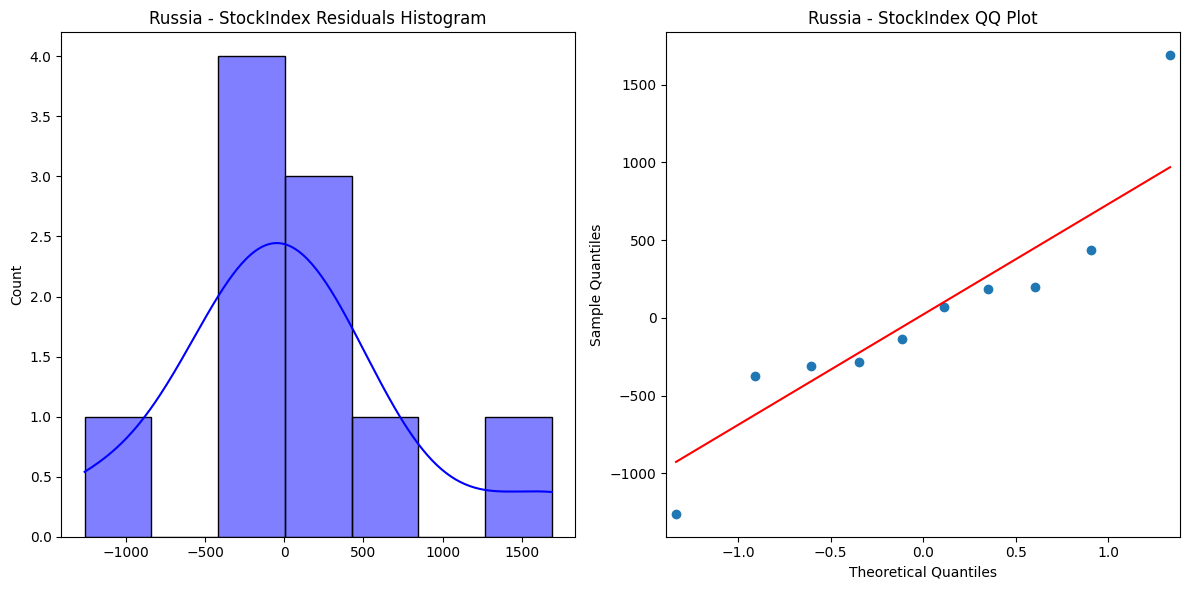

ValueError: could not broadcast input array from shape (10,) into shape (21,)

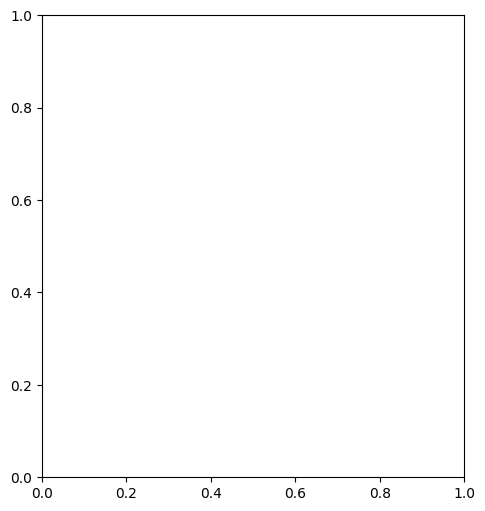

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Функция для построения модели ARMA и прогнозирования
def build_and_forecast_arma(data, country, column, order=(2, 0)):
    # Выбор временного ряда для анализа
    ts = data[column].dropna()  # Удаление пропущенных значений

    # Проверка на стационарность временного ряда
    result = sm.tsa.adfuller(ts)
    print(f"ADF Statistic for {column}: {result[0]}")
    print(f"p-value for {column}: {result[1]}")
    for key, value in result[4].items():
        print('Critical Values:')
        print(f"   {key}: {value}")

    # Построение модели ARMA (используя ARIMA с d=0)
    model = ARIMA(ts, order=(order[0], 0, order[1])).fit()

    # Прогнозирование на 10 периодов вперед
    forecast_steps = 40
    forecast = model.get_forecast(steps=forecast_steps)
    forecast_df = forecast.summary_frame()['mean']
    forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='Y')[1:]
    forecast_df.index = forecast_index

    # Визуализация результатов
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label=f'Historical {column}')
    plt.plot(forecast_df, label=f'Forecast {column}', color='red')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{country} - {column} ARMA Model Forecast')
    plt.legend()
    plt.show()

    # График остатков
    residuals = model.resid
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, color='blue')
    plt.title(f'{country} - {column} Residuals Histogram')
    plt.subplot(1, 2, 2)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(f'{country} - {column} QQ Plot')
    plt.tight_layout()
    plt.show()

    # Автокорреляция остатков
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sm.graphics.tsa.plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{country} - {column} ACF of Residuals')
    plt.subplot(1, 2, 2)
    sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{country} - {column} PACF of Residuals')
    plt.tight_layout()
    plt.show()

    return model, forecast_df

# Пример для Бразилии
country = 'Russia'
data = pd.read_csv(f'{country}_macro_stock_data.csv', index_col='Year')
data.index = pd.to_datetime(data.index, format='%Y')

# Параметры модели ARMA (p, q)
arma_order = (2, 2)



# Построение и прогнозирование модели ARMA для StockIndex
arma_model_stock, forecast_stock = build_and_forecast_arma(data, country, 'StockIndex', order=arma_order)


# VECM

Eigenvalues: [0.47845894 0.28705617]
Trace Statistic: [23.7436781   8.12046341]
Critical Values (Trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max-Eigen Statistic: [15.62321468  8.12046341]
Critical Values (Max-Eigen): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Det. terms outside the coint. relation & lagged endog. parameters for equation GDP
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.GDP           -0.2606      0.166     -1.571      0.116      -0.586       0.065
L1.StockIndex -5.784e+07   1.41e+08     -0.409      0.683   -3.35e+08    2.19e+08
Det. terms outside the coint. relation & lagged endog. parameters for equation StockIndex
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.GDP         -5.97e-11   2.26e-10     -0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


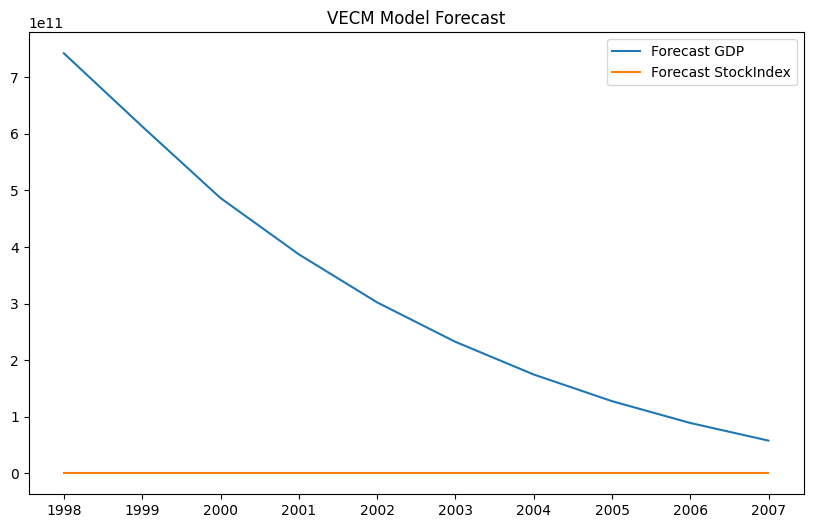

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

# Загрузка данных (пример для одной страны)
data = pd.read_csv('China_macro_stock_data.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Выбор временных рядов для анализа
variables = data[['GDP', 'StockIndex']]

# Проверка на коинтеграцию
johansen_test = coint_johansen(variables, det_order=0, k_ar_diff=1)

# Вывод результатов теста Йохансена
print('Eigenvalues:', johansen_test.eig)
print('Trace Statistic:', johansen_test.lr1)
print('Critical Values (Trace):', johansen_test.cvt)
print('Max-Eigen Statistic:', johansen_test.lr2)
print('Critical Values (Max-Eigen):', johansen_test.cvm)

# Определение ранга коинтеграции на основе критических значений
coint_rank = 0
for i, trace_stat in enumerate(johansen_test.lr1):
    if trace_stat > johansen_test.cvt[i, 1]:  # Сравнение с критическим значением на 5% уровне
        coint_rank = i + 1

# Если ряды коинтегрированы, строим модель VECM
vecm_model = VECM(variables, k_ar_diff=1, coint_rank=coint_rank)
vecm_fit = vecm_model.fit()

# Вывод результатов
print(vecm_fit.summary())

# Прогнозирование на 10 лет вперед
forecast = vecm_fit.predict(steps=10)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=variables.index[-1], periods=10, freq='Y'), columns=variables.columns)
print(forecast_df)

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[column], label=f'Forecast {column}')
plt.legend()
plt.title('VECM Model Forecast')
plt.show()


# ARIMA

ADF Statistic for GDP: -0.40529524912816683
p-value for GDP: 0.9092108991036143
Critical Values:
   1%: -3.8092091249999998
Critical Values:
   5%: -3.0216450000000004
Critical Values:
   10%: -2.6507125


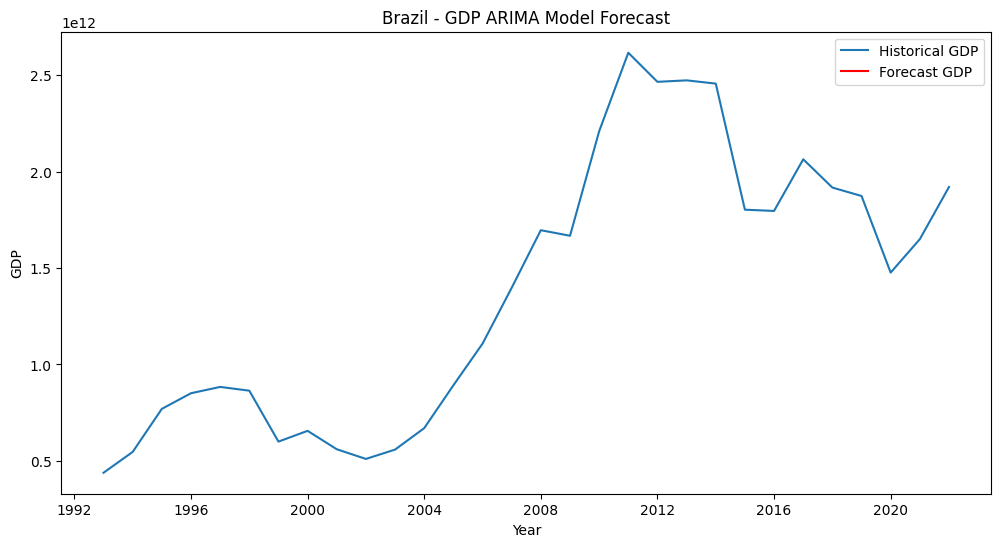

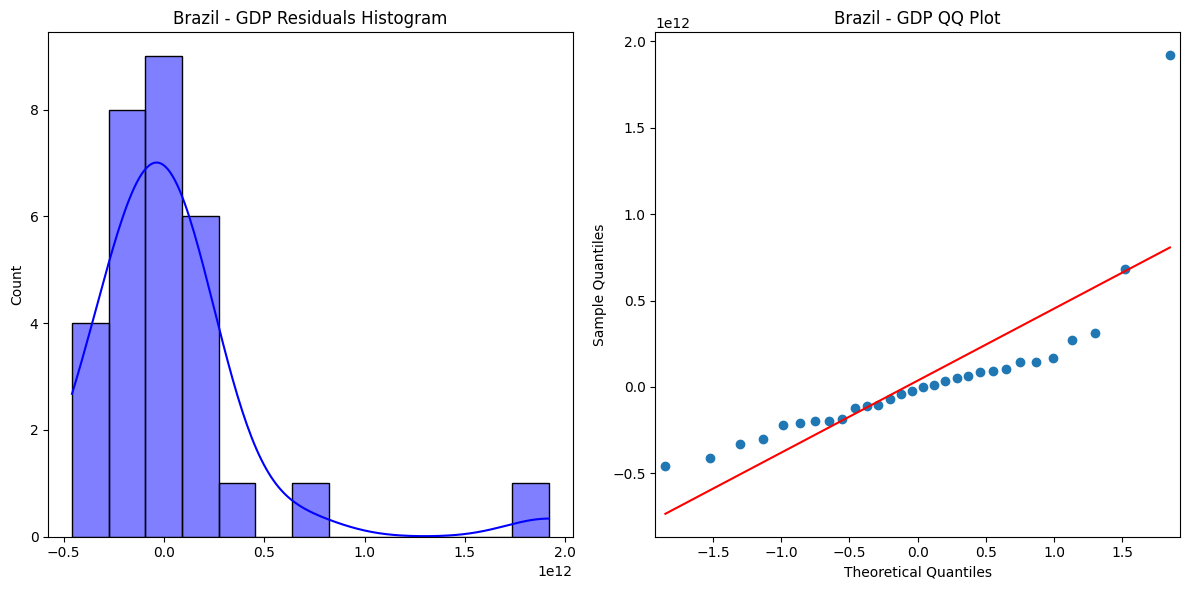

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 15.

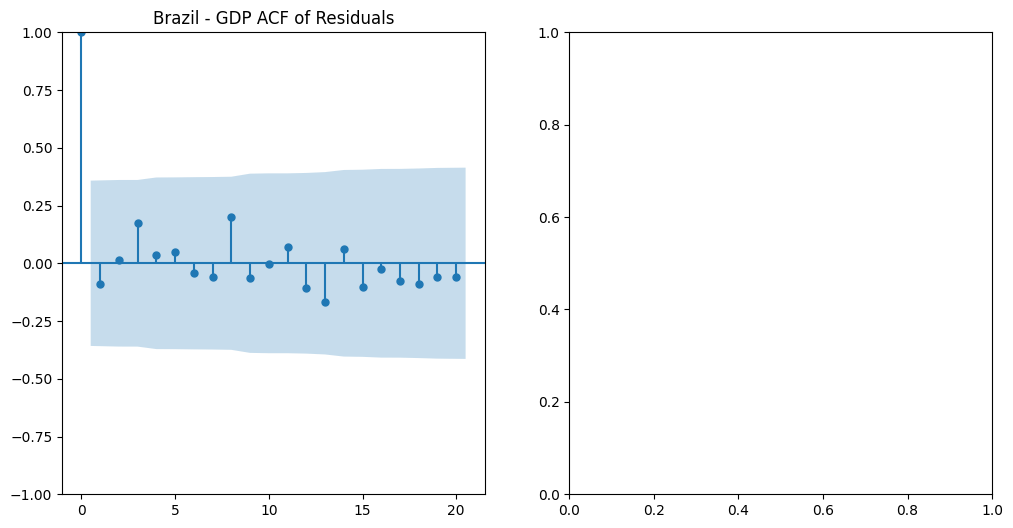

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Функция для построения модели ARIMA и прогнозирования
def build_and_forecast_arima(data, country, column, order=(2, 1, 2)):
    # Выбор временного ряда для анализа
    ts = data[column].dropna()  # Удаление пропущенных значений

    # Проверка на стационарность временного ряда
    result = sm.tsa.adfuller(ts)
    print(f"ADF Statistic for {column}: {result[0]}")
    print(f"p-value for {column}: {result[1]}")
    for key, value in result[4].items():
        print('Critical Values:')
        print(f"   {key}: {value}")

    # Построение модели ARIMA
    model = ARIMA(ts, order=order).fit()

    # Прогнозирование на 10 периодов вперед
    forecast_steps = 10
    forecast = model.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='Y')[1:]
    forecast_df = pd.DataFrame(forecast_mean, index=forecast_index, columns=[f'{column}_Forecast'])

    # Визуализация результатов
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label=f'Historical {column}')
    plt.plot(forecast_df, label=f'Forecast {column}', color='red')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{country} - {column} ARIMA Model Forecast')
    plt.legend()
    plt.show()

    # График остатков
    residuals = model.resid
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, color='blue')
    plt.title(f'{country} - {column} Residuals Histogram')
    plt.subplot(1, 2, 2)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(f'{country} - {column} QQ Plot')
    plt.tight_layout()
    plt.show()

    # Автокорреляция остатков
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sm.graphics.tsa.plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{country} - {column} ACF of Residuals')
    plt.subplot(1, 2, 2)
    sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{country} - {column} PACF of Residuals')
    plt.tight_layout()
    plt.show()

    return model, forecast_df

# Пример для Бразилии
country = 'Brazil'
data = pd.read_csv(f'{country}_macro_stock_data.csv', index_col='Year')
data.index = pd.to_datetime(data.index, format='%Y')

# Параметры модели ARIMA (p, d, q)
arima_order = (2, 1, 2)

# Построение и прогнозирование модели ARIMA для GDP
arima_model_gdp, forecast_gdp = build_and_forecast_arima(data, country, 'GDP', order=arima_order)

# Построение и прогнозирование модели ARIMA для StockIndex
arima_model_stock, forecast_stock = build_and_forecast_arima(data, country, 'StockIndex', order=arima_order)


In [14]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00


# GARCH

In [18]:
!pip3 install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 4.7 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Загрузка данных (пример для одной страны)
data = pd.read_csv('Brazil_macro_stock_data.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Выбор временного ряда для анализа
stock_index = data['StockIndex']

# Проверка стационарности временного ряда
returns = stock_index.pct_change().dropna()  # Возвращает логарифмические доходности

# Построение модели GARCH
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()

# Вывод результатов модели
print(model_fit.summary())

# Прогнозирование волатильности на 10 периодов вперед
forecast = model_fit.forecast(horizon=10)
forecast_variance = forecast.variance[-1:]
forecast_index = pd.date_range(start=returns.index[-1], periods=10, freq='Y')
forecast_df = pd.DataFrame(np.sqrt(forecast_variance.values.T), index=forecast_index, columns=['ForecastVolatility'])

# Визуализация исторической и прогнозируемой волатильности
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns, label='Historical Returns')
plt.plot(forecast_df.index, forecast_df['ForecastVolatility'], label='Forecast Volatility', color='red')
plt.legend()
plt.title('GARCH Model Forecast for Stock Index Volatility')
plt.show()


ModuleNotFoundError: No module named 'arch'

# VAR

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, May, 2024
Time:                     07:36:55
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    29.6182
Nobs:                     24.0000    HQIC:                   23.4514
Log likelihood:          -390.185    FPE:                2.75101e+11
AIC:                      21.2245    Det(Omega_mle):     1.44603e+09
--------------------------------------------------------------------
Results for equation GDP
                            coefficient            std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const              3954889572490.181641  1211986255717.650391            3.263           0.001
L1.GDP                         1.460551              0.448249            3.258           0.001
L1.CPI

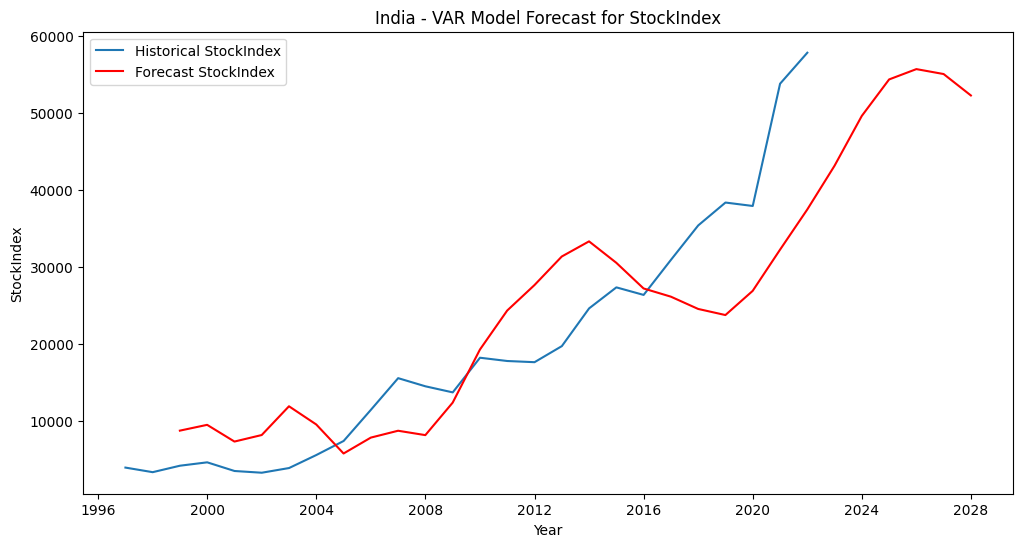

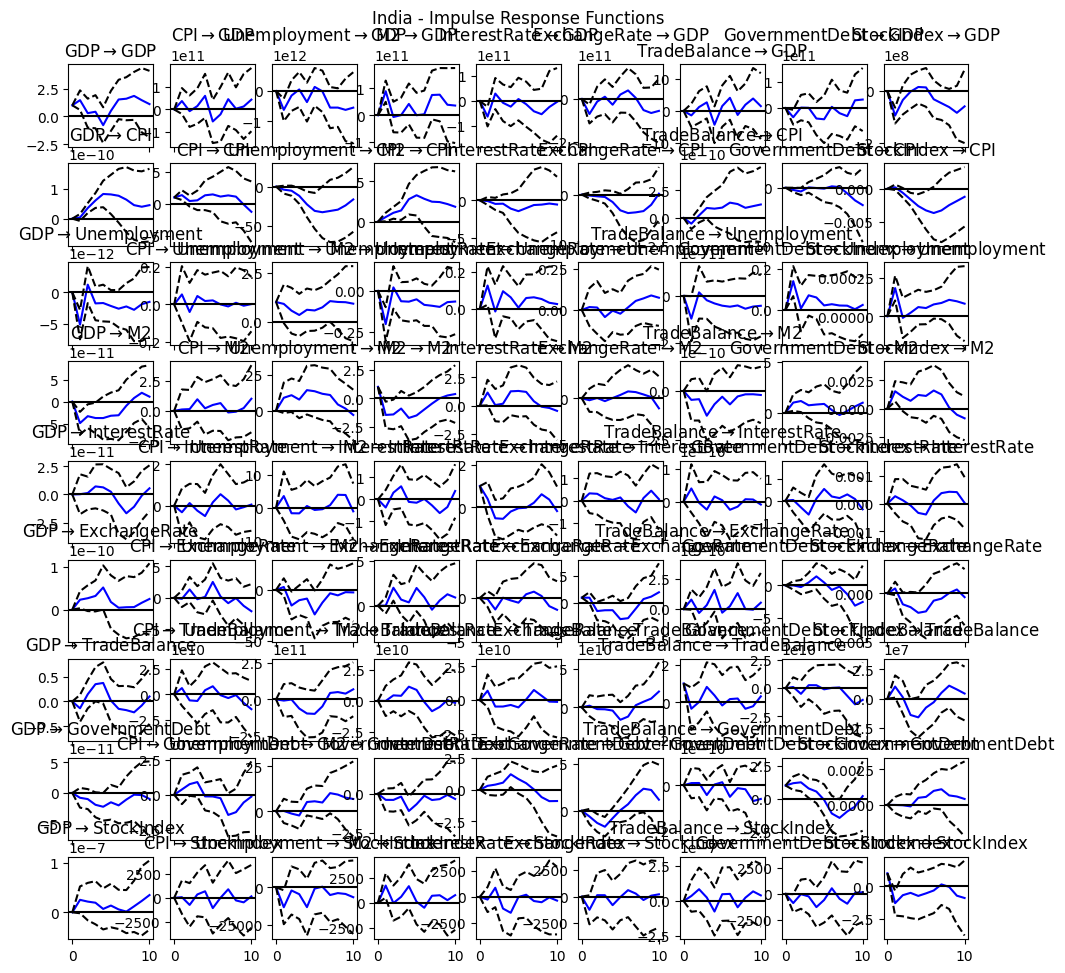

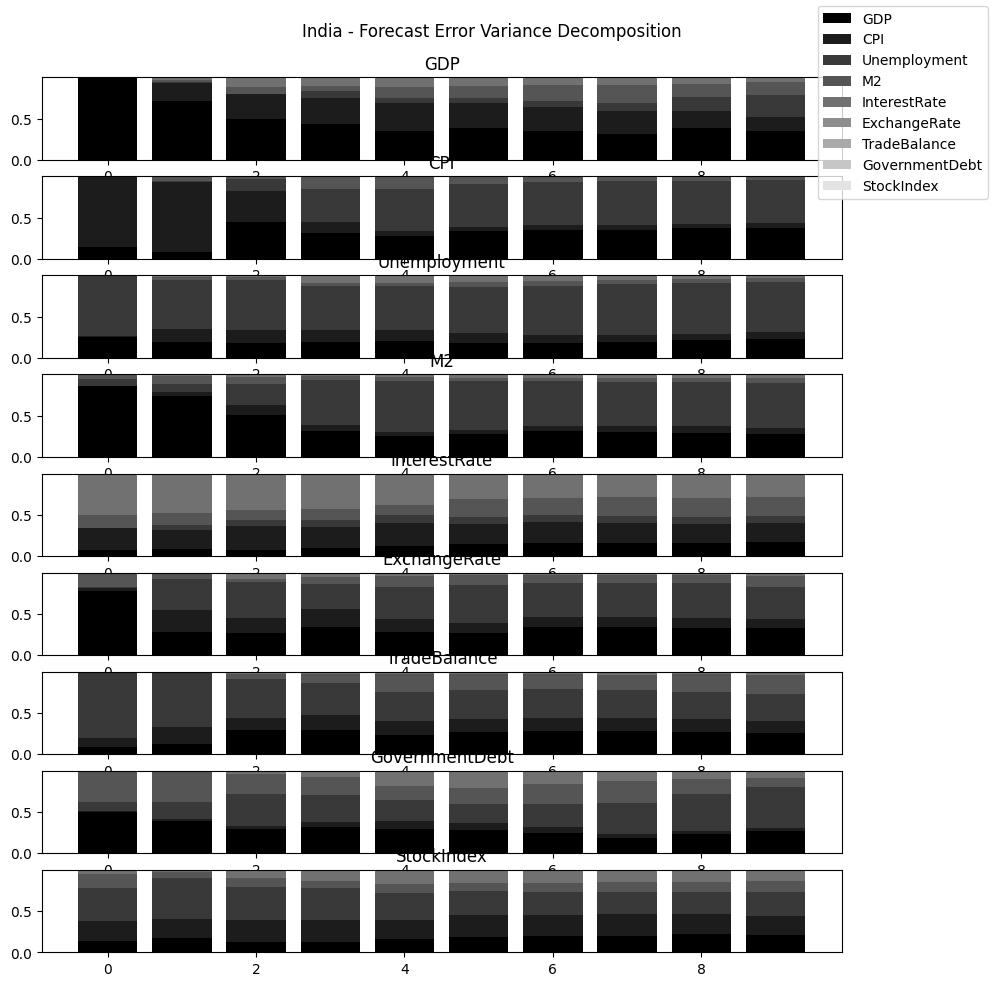

In [66]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Функция для построения и анализа модели VAR
def build_and_analyze_var(data, country):
    # Выбор временных рядов для анализа (все макроэкономические показатели и фондовый индекс)
    variables = data[['GDP', 'CPI', 'Unemployment', 'M2', 'InterestRate', 'ExchangeRate', 'TradeBalance', 'GovernmentDebt', 'StockIndex']]

    # Построение модели VAR
    model = VAR(variables)
    results = model.fit(maxlags=2)

    # Вывод результатов модели
    print(results.summary())

    # Прогнозирование на 10 лет вперед
    forecast_steps = 30
    forecast = results.forecast(variables.values[-results.k_ar:], steps=forecast_steps)
    forecast_index = pd.date_range(start=variables.index[-1], periods=forecast_steps+1, freq='Y')[1:]
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=variables.columns)

    # Визуализация прогнозов для StockIndex
    plt.figure(figsize=(12, 6))
    plt.plot(variables.index, variables['StockIndex'], label='Historical StockIndex')
    plt.plot(forecast_df.index, forecast_df['StockIndex'], label='Forecast StockIndex', color='red')
    plt.xlabel('Year')
    plt.ylabel('StockIndex')
    plt.title(f'{country} - VAR Model Forecast for StockIndex')
    plt.legend()
    plt.show()

    # Анализ импульсных откликов
    irf = results.irf(10)
    irf.plot(orth=False)
    plt.suptitle(f'{country} - Impulse Response Functions')
    plt.show()

    # Декомпозиция дисперсии
    fevd = results.fevd(10)
    fevd.plot()
    plt.suptitle(f'{country} - Forecast Error Variance Decomposition')
    plt.show()

    return results, forecast_df

# Пример для Бразилии
country = 'India'
data = pd.read_csv(f'{country}_macro_stock_data.csv', index_col='Year')
data.index = pd.to_datetime(data.index, format='%Y')

# Построение и анализ модели VAR для Бразилии
var_results, forecast_df = build_and_analyze_var(data, country)


In [ ]:
рфпл